# HOUSING PROJECT

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.pandas.set_option('display.max_columns',None)

In [2]:
#Loading Train Dataset
df = pd.read_csv('C:/Users/amitt/Downloads/Compressed/Project-Housing_splitted/train.csv')
df

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     127         120       RL          NaN     4928   Pave   NaN      IR1   
1     889          20       RL         95.0    15865   Pave   NaN      IR1   
2     793          60       RL         92.0     9920   Pave   NaN      IR1   
3     110          20       RL        105.0    11751   Pave   NaN      IR1   
4     422          20       RL          NaN    16635   Pave   NaN      IR1   
...   ...         ...      ...          ...      ...    ...   ...      ...   
1163  289          20       RL          NaN     9819   Pave   NaN      IR1   
1164  554          20       RL         67.0     8777   Pave   NaN      Reg   
1165  196         160       RL         24.0     2280   Pave   NaN      Reg   
1166   31          70  C (all)         50.0     8500   Pave  Pave      Reg   
1167  617          60       RL          NaN     7861   Pave   NaN      IR1   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0            Lvl    AllPub    Inside       Gtl      NPkVill       Norm   
1            Lvl    AllPub    Inside       Mod        NAmes       Norm   
2            Lvl    AllPub   CulDSac       Gtl      NoRidge       Norm   
3            Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
4            Lvl    AllPub       FR2       Gtl       NWAmes       Norm   
...          ...       ...       ...       ...          ...        ...   
1163         Lvl    AllPub    Inside       Gtl       Sawyer       Norm   
1164         Lvl    AllPub    Inside       Gtl      Edwards      Feedr   
1165         Lvl    AllPub       FR2       Gtl      NPkVill       Norm   
1166         Lvl    AllPub    Inside       Gtl       IDOTRR      Feedr   
1167         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0          Norm   TwnhsE     1Story            6            5       1976   
1          Norm     1Fam     1Story            8            6       1970   
2          Norm     1Fam     2Story            7            5       1996   
3          Norm     1Fam     1Story            6            6       1977   
4          Norm     1Fam     1Story            6            7       1977   
...         ...      ...        ...          ...          ...        ...   
1163       Norm     1Fam     1Story            5            5       1967   
1164       Norm     1Fam     1Story            4            5       1949   
1165       Norm    Twnhs     2Story            6            6       1976   
1166       Norm     1Fam     2Story            4            4       1920   
1167       Norm     1Fam     2Story            6            5       2002   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0             1976     Gable  CompShg     Plywood     Plywood       None   
1             1970      Flat  Tar&Grv     Wd Sdng     Wd Sdng       None   
2             1997     Gable  CompShg     MetalSd     MetalSd       None   
3             1977       Hip  CompShg     Plywood     Plywood    BrkFace   
4             2000     Gable  CompShg     CemntBd     CmentBd      Stone   
...            ...       ...      ...         ...         ...        ...   
1163          1967     Gable  CompShg     MetalSd     MetalSd    BrkFace   
1164          2003     Gable  CompShg     VinylSd     VinylSd       None   
1165          1976     Gable  CompShg     Plywood     Brk Cmn       None   
1166          1950   Gambrel  CompShg     BrkFace     BrkFace       None   
1167          2003     Gable  CompShg     VinylSd     VinylSd       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0            0.0        TA        TA     CBlock       Gd       TA   
1            0.0        Gd        Gd      PConc       TA       Gd   
2            0.0        Gd        TA      PConc       Gd       TA   
3          480.0        TA        TA     CBlock       Gd       TA   
4         

In [3]:
df.shape

(1168, 81)

We have 1168 rows and 81 columns in the train data set

In [4]:
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [5]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [6]:
#Checking Null/Missing Values
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      214
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [7]:
null=pd.DataFrame(df[df.columns[df.isnull().any()]].isnull().sum())
null.columns=['null_values']
null

null_values
LotFrontage           214
Alley                1091
MasVnrType              7
MasVnrArea              7
BsmtQual               30
BsmtCond               30
BsmtExposure           31
BsmtFinType1           30
BsmtFinType2           31
FireplaceQu           551
GarageType             64
GarageYrBlt            64
GarageFinish           64
GarageQual             64
GarageCond             64
PoolQC               1161
Fence                 931
MiscFeature          1124

<AxesSubplot:>

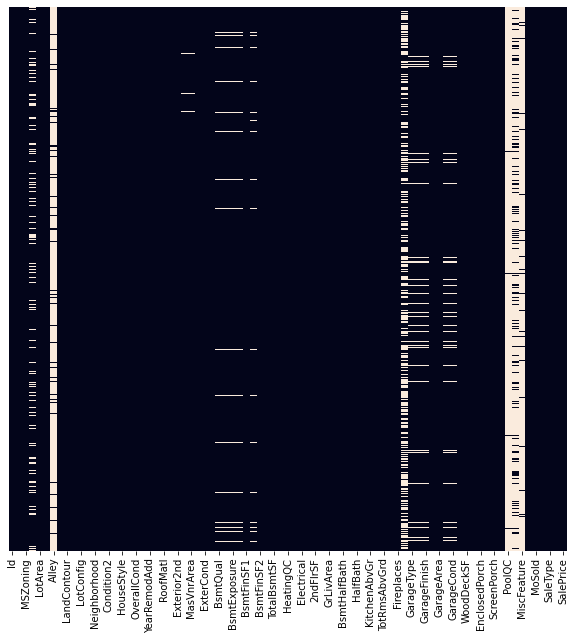

In [8]:
plt.figure(figsize=(10,10))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

LotFrontage, Alley, MasVnrType, MasVnrArea, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageQual, GarageCond, PoolQC, Fence and MiscFeature have null values.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

Filling Missing Values in Continuous Columns with mean


In [10]:
df['LotFrontage']=df['LotFrontage'].fillna(df['LotFrontage'].mean())


In [11]:
df.drop(['Alley'],axis=1,inplace=True)


Filling Missing Values in Categorical Features with mode

In [12]:
df['BsmtQual']=df['BsmtQual'].fillna(df['BsmtQual'].mode()[0])
df['BsmtCond']=df['BsmtCond'].fillna(df['BsmtCond'].mode()[0])
df['FireplaceQu']=df['FireplaceQu'].fillna(df['FireplaceQu'].mode()[0])
df['GarageType']=df['GarageType'].fillna(df['GarageType'].mode()[0])

In [13]:
df.drop(['GarageYrBlt'],axis=1,inplace=True)
df['GarageFinish']=df['GarageFinish'].fillna(df['GarageFinish'].mode()[0])
df['GarageQual']=df['GarageQual'].fillna(df['GarageQual'].mode()[0])
df['GarageCond']=df['GarageCond'].fillna(df['GarageCond'].mode()[0])
df.drop(['PoolQC','Fence','MiscFeature'],axis=1,inplace=True)


In [14]:
df.shape

(1168, 76)

In [15]:
df.drop(['Id'],axis=1,inplace=True)


In [16]:
null=pd.DataFrame(df[df.columns[df.isnull().any()]].isnull().sum())
null.columns=['null_values']
null

null_values
MasVnrType              7
MasVnrArea              7
BsmtExposure           31
BsmtFinType1           30
BsmtFinType2           31

In [17]:
df['BsmtFinType1']=df['BsmtFinType1'].fillna(df['BsmtFinType1'].mode()[0])
df['BsmtFinType2']=df['BsmtFinType2'].fillna(df['BsmtFinType2'].mode()[0])
df['MasVnrType']=df['MasVnrType'].fillna(df['MasVnrType'].mode()[0])
df['MasVnrArea']=df['MasVnrArea'].fillna(df['MasVnrArea'].mode()[0])
df['BsmtExposure']=df['BsmtExposure'].fillna(df['BsmtExposure'].mode()[0])


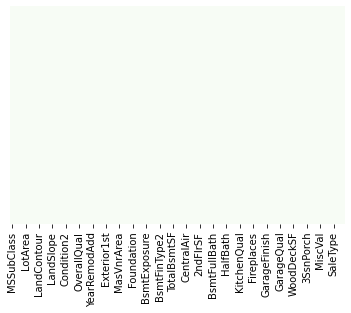

In [21]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='Greens')
plt.show()

In [22]:
#STATISTICAL SUMMARY
df.describe()

MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1168.000000  1168.000000    1168.000000  1168.000000  1168.000000   
mean     56.767979    70.988470   10484.749144     6.104452     5.595890   
std      41.940650    22.437056    8957.442311     1.390153     1.124343   
min      20.000000    21.000000    1300.000000     1.000000     1.000000   
25%      20.000000    60.000000    7621.500000     5.000000     5.000000   
50%      50.000000    70.988470    9522.500000     6.000000     5.000000   
75%      70.000000    79.250000   11515.500000     7.000000     6.000000   
max     190.000000   313.000000  164660.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  \
count  1168.000000   1168.000000  1168.000000  1168.000000  1168.000000   
mean   1970.930651   1984.758562   101.696918   444.726027    46.647260   
std      30.145255     20.785185   182.218483   462.664785   163.520016   
min    1875.000000   1950.000000     0.000000     0.000000     0.000000   
25%    1954.000000   1966.000000     0.000000     0.000000     0.000000   
50%    1972.000000   1993.000000     0.000000   385.500000     0.000000   
75%    2000.000000   2004.000000   160.000000   714.500000     0.000000   
max    2010.000000   2010.000000  1600.000000  5644.000000  1474.000000   

         BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF  \
count  1168.000000  1168.000000  1168.000000  1168.000000   1168.000000   
mean    569.721747  1061.095034  1169.860445   348.826199      6.380137   
std     449.375525   442.272249   391.161983   439.696370     50.892844   
min       0.000000     0.000000   334.000000     0.000000      0.000000   
25%     216.000000   799.000000   892.000000     0.000000      0.000000   
50%     474.000000  1005.500000  1096.500000     0.000000      0.000000   
75%     816.000000  1291.500000  1392.000000   729.000000      0.000000   
max    2336.000000  6110.000000  4692.000000  2065.000000    572.000000   

         GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath     HalfBath  \
count  1168.000000   1168.000000   1168.000000  1168.000000  1168.000000   
mean   1525.066781      0.425514      0.055651     1.562500     0.388699   
std     528.042957      0.521615      0.236699     0.551882     0.504929   
min     334.000000      0.000000      0.000000     0.000000     0.000000   
25%    1143.250000      0.000000      0.000000     1.000000     0.000000   
50%    1468.500000      0.000000      0.000000     2.000000     0.000000   
75%    1795.000000      1.000000      0.000000     2.000000     1.000000   
max    5642.000000      3.000000      2.000000     3.000000     2.000000   

       BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces   GarageCars  \
count   1168.000000   1168.000000   1168.000000  1168.000000  1168.000000   
mean       2.884418      1.045377      6.542808     0.617295     1.776541   
std        0.817229      0.216292      1.598484     0.650575     0.745554   
min        0.000000      0.000000      2.000000     0.000000     0.000000   
25%        2.000000      1.000000      5.000000     0.000000     1.000000   
50%        3.000000      1.000000      6.000000     1.000000     2.000000   
75%        3.000000      1.000000      7.000000     1.000000     2.000000   
max        8.000000      3.000000     14.000000     3.000000     4.000000   

        GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  \
count  1168.000000  1168.000000  1168.000000    1168.000000  1168.000000   
mean    476.860445    96.206336    46.559932      23.015411     3.639555   
std     214.466769   126.158988    66.381023      63.191089    29.088867   
min       0.000000     0.000000     0.000000       0.000000     0.000000   
25%     338.000000     0.000000     0.000000       0.000000     0.000000   
50%     480.000000     0.000000    24.000000       0.000000     0.000000   
75%     576.000000   171.000000    70.000000       0.000000 


Mean is more than median for SalePrice, MoSold, MiscVal, PoolArea, ScreenPorch, 3SsnPorch, EnclosedPorch, OpenPorchSF, WoodDeckSF, BsmtFinSF1, MasVnrArea, YearRemodAdd, OverallCond, OverallQual, LotArea, LotFrontage, MSSubClass and Id Column.

There is large difference between 75% and maximum for Price column.

In [23]:
#Finding Correlation
dfcorr=df.corr()
dfcorr

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  \
MSSubClass       1.000000    -0.336681 -0.124151     0.070462    -0.056978   
LotFrontage     -0.336681     1.000000  0.299452     0.229218    -0.047573   
LotArea         -0.124151     0.299452  1.000000     0.107188     0.017513   
OverallQual      0.070462     0.229218  0.107188     1.000000    -0.083167   
OverallCond     -0.056978    -0.047573  0.017513    -0.083167     1.000000   
YearBuilt        0.023988     0.112655  0.005506     0.575800    -0.377731   
YearRemodAdd     0.056618     0.088799  0.027228     0.555945     0.080669   
MasVnrArea       0.028215     0.188108  0.120192     0.403985    -0.135133   
BsmtFinSF1      -0.052236     0.228996  0.221851     0.219643    -0.028810   
BsmtFinSF2      -0.062403     0.002159  0.056656    -0.040893     0.044336   
BsmtUnfSF       -0.134170     0.113924  0.006600     0.308676    -0.146384   
TotalBsmtSF     -0.214042     0.356107  0.259733     0.528285    -0.162481   
1stFlrSF        -0.227927     0.403436  0.312843     0.458758    -0.134420   
2ndFlrSF         0.300366     0.089675  0.059803     0.316624     0.036668   
LowQualFinSF     0.053737     0.007506 -0.001915    -0.039295     0.041877   
GrLivArea        0.086448     0.374251  0.281360     0.599700    -0.065006   
BsmtFullBath     0.004556     0.094046  0.142387     0.101732    -0.039680   
BsmtHalfBath     0.008207     0.001389  0.059282    -0.030702     0.091016   
FullBath         0.140807     0.171773  0.123197     0.548824    -0.171931   
HalfBath         0.168423     0.047816  0.007271     0.296134    -0.052125   
BedroomAbvGr    -0.013283     0.237199  0.117351     0.099639     0.028393   
KitchenAbvGr     0.283506    -0.002729 -0.013075    -0.178220    -0.076047   
TotRmsAbvGrd     0.051179     0.318771  0.184546     0.432579    -0.039952   
Fireplaces      -0.035792     0.230610  0.285983     0.390067    -0.013632   
GarageCars      -0.027639     0.260252  0.158313     0.596322    -0.161996   
GarageArea      -0.092408     0.322644  0.195162     0.566782    -0.126021   
WoodDeckSF      -0.022609     0.088334  0.216720     0.227137     0.012290   
OpenPorchSF      0.017468     0.151328  0.093080     0.341030    -0.024899   
EnclosedPorch   -0.004252     0.020902 -0.007446    -0.098374     0.056074   
3SsnPorch       -0.043210     0.051084  0.025794     0.045919     0.040476   
ScreenPorch     -0.013291     0.030405  0.025256     0.059387     0.069463   
PoolArea         0.009583     0.196001  0.097107     0.072247    -0.003603   
MiscVal         -0.023503    -0.001329  0.051679    -0.025786     0.075178   
MoSold          -0.016015     0.022517  0.015141     0.090638     0.005519   
YrSold          -0.038595    -0.003885 -0.035399    -0.048759     0.055517   
SalePrice       -0.060775     0.323779  0.249499     0.789185    -0.065642   

               YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  \
MSSubClass      0.023988      0.056618    0.028215   -0.052236   -0.062403   
LotFrontage     0.112655      0.088799    0.188108    0.228996    0.002159   
LotArea         0.005506      0.027228    0.120192    0.221851    0.056656   
OverallQual     0.575800      0.555945    0.403985    0.219643   -0.040893   
OverallCond    -0.377731      0.080669   -0.135133   -0.028810    0.044336   
YearBuilt       1.000000      0.592829    0.318562    0.227933   -0.027682   
YearRemodAdd    0.592829      1.000000    0.178583    0.114430   -0.044694   
MasVnrArea      0.318562      0.178583    1.000000    0.263377   -0.064685   
BsmtFinSF1      0.227933      0.114430    0.263377    1.000000   -0.052145   
BsmtFinSF2     -0.027682     -0.044694   -0.064685   -0.052145    1.000000   
BsmtUnfSF       0.155559      0.174732    0.108974   -0.499861   -0.213580   
TotalBsmtSF     0.386265      0.280720    0.362330    0.518940    0.098167   
1stFlrSF        0.279450      0.233384    0.334512    0.445876    0.093442   
2ndFlrSF        0.011834      0.1551

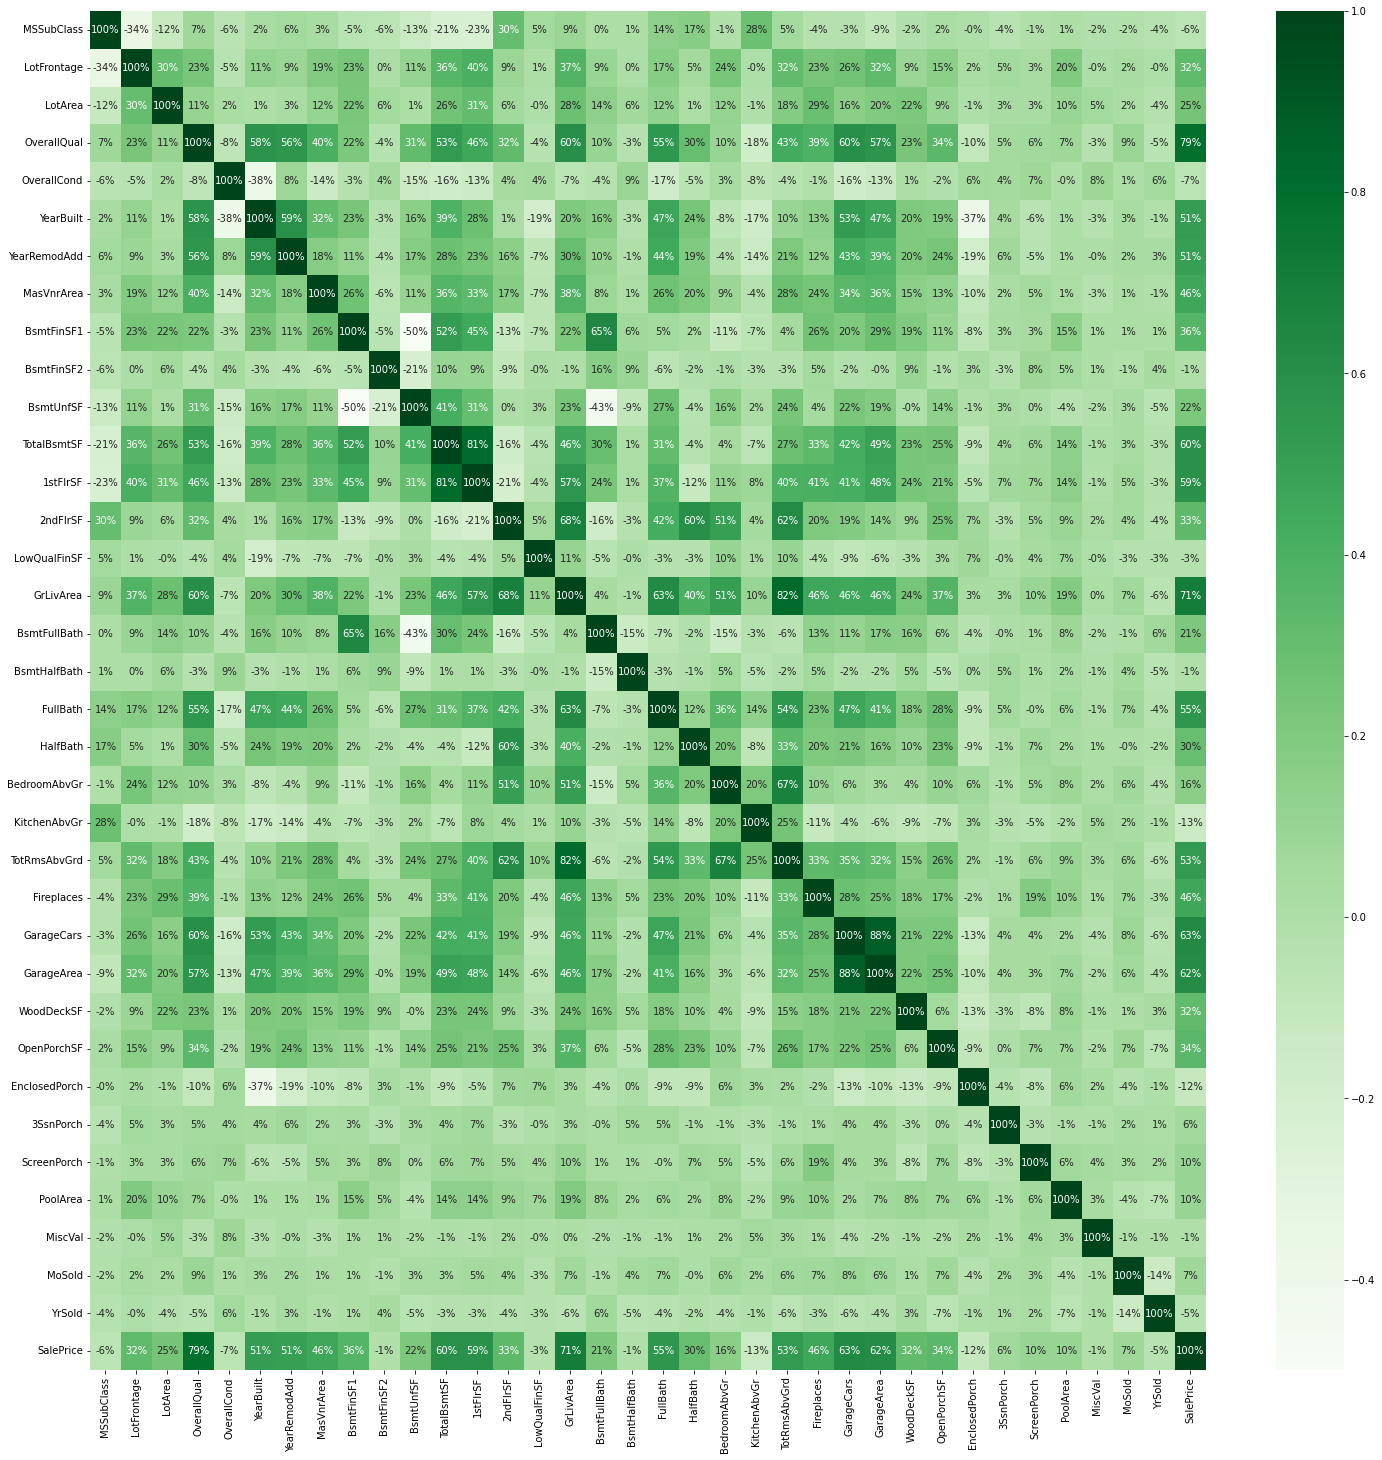

In [24]:
plt.figure(figsize=(25,25))
sns.heatmap(dfcorr,annot=True,fmt='.0%',cmap='Greens')
plt.show()

SalesPrice is highly positively correlated with the columns OverallQual, YearBuilt, YearRemodAdd, TotalBsmtSF, 1stFlrSF, GrLivArea, FullBath, TotRmsAbvGrd, GarageCars, GarageArea.

SalePrice is negatively correlated with OverallCond, KitchenAbvGr, Encloseporch, YrSold.

As there is multicollinearity found in between columns so we will use Pricipal Component Analysis.

In [25]:
#Exploring Target Variable
df['SalePrice'].value_counts()

140000    18
135000    16
155000    12
139000    11
160000    11
          ..
203000     1
144900     1
37900      1
178400     1
183200     1
Name: SalePrice, Length: 581, dtype: int64

As there is a continuos values in SalePrice so this is a REGRESSION Problem.


Skew is: 1.953877705368286


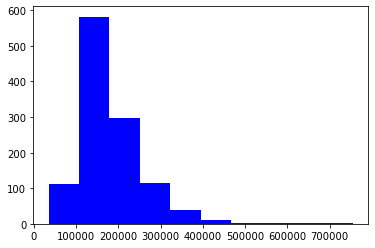

In [26]:

print ("Skew is:", df.SalePrice.skew())
plt.hist(df.SalePrice, color='blue')
plt.show()

<AxesSubplot:xlabel='SalePrice'>

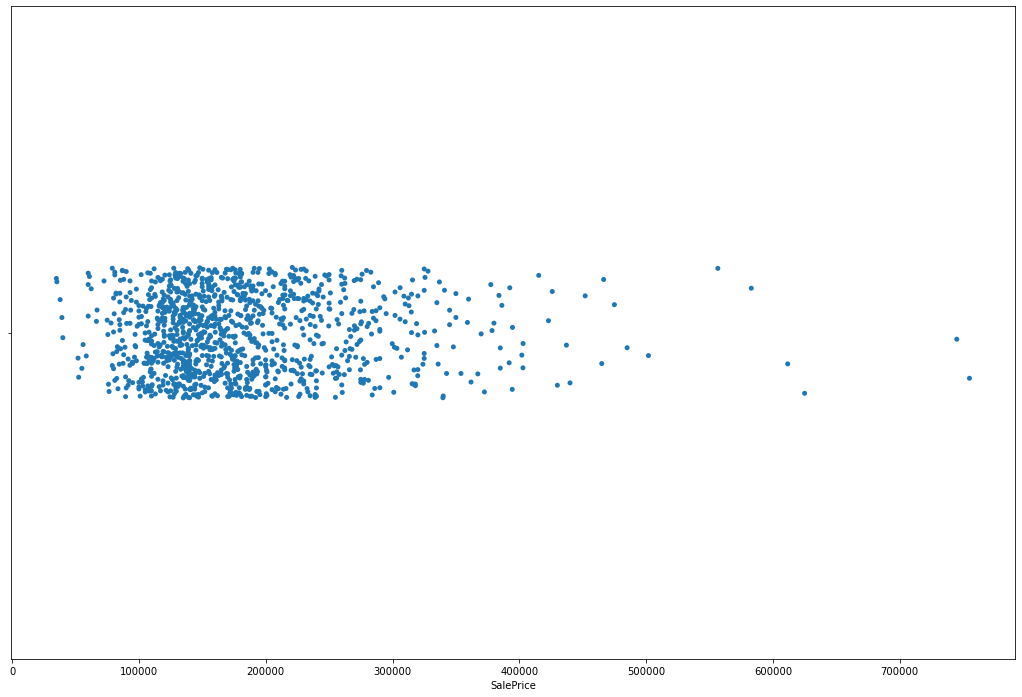

In [27]:
plt.figure(figsize=(18,12))
sns.stripplot(df['SalePrice'])

Majorly Sales Price are between 100000 and 200000.

In [28]:
#Bivariate Analysis
df_str_types=[]
for i in df.columns:
    if df[i].dtypes == "object":
        df_str_types.append(i)


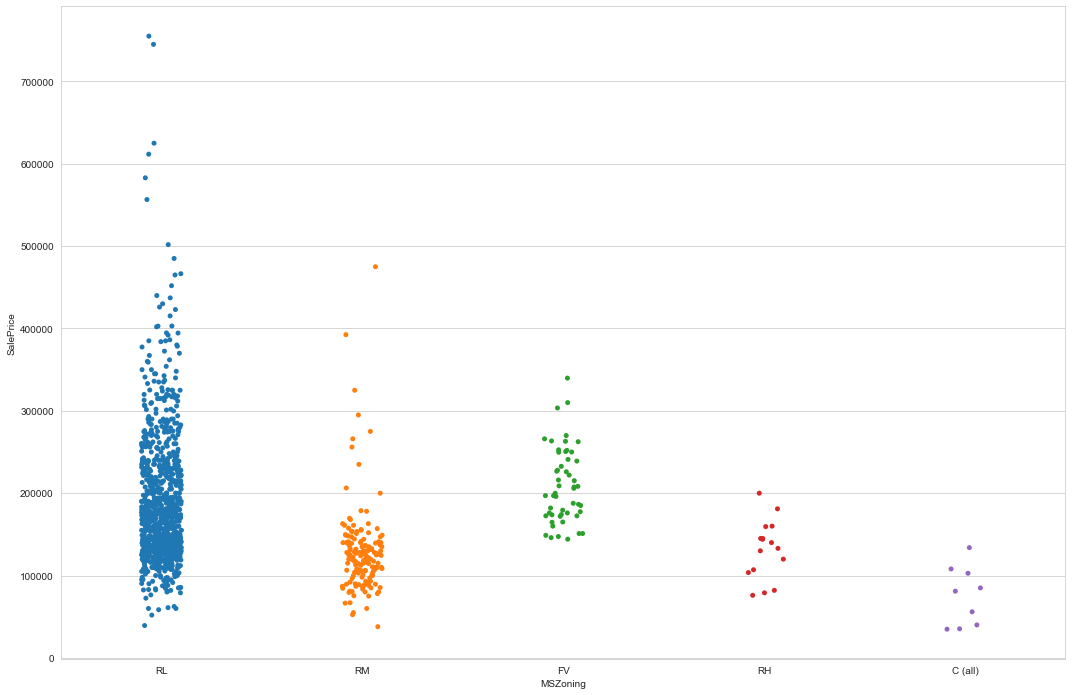

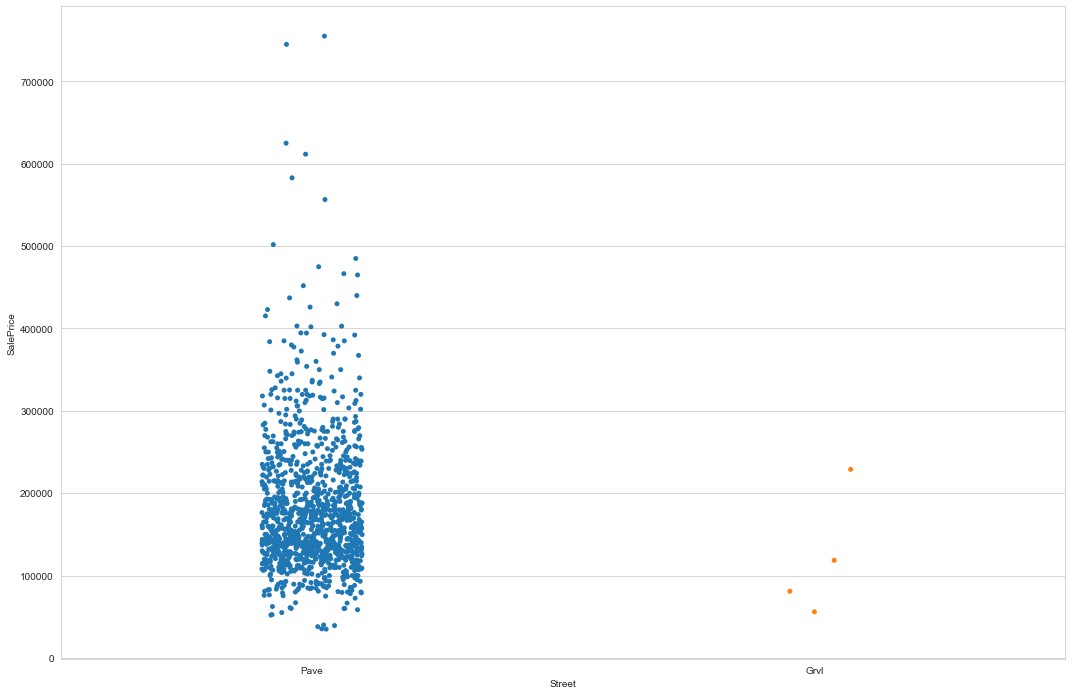

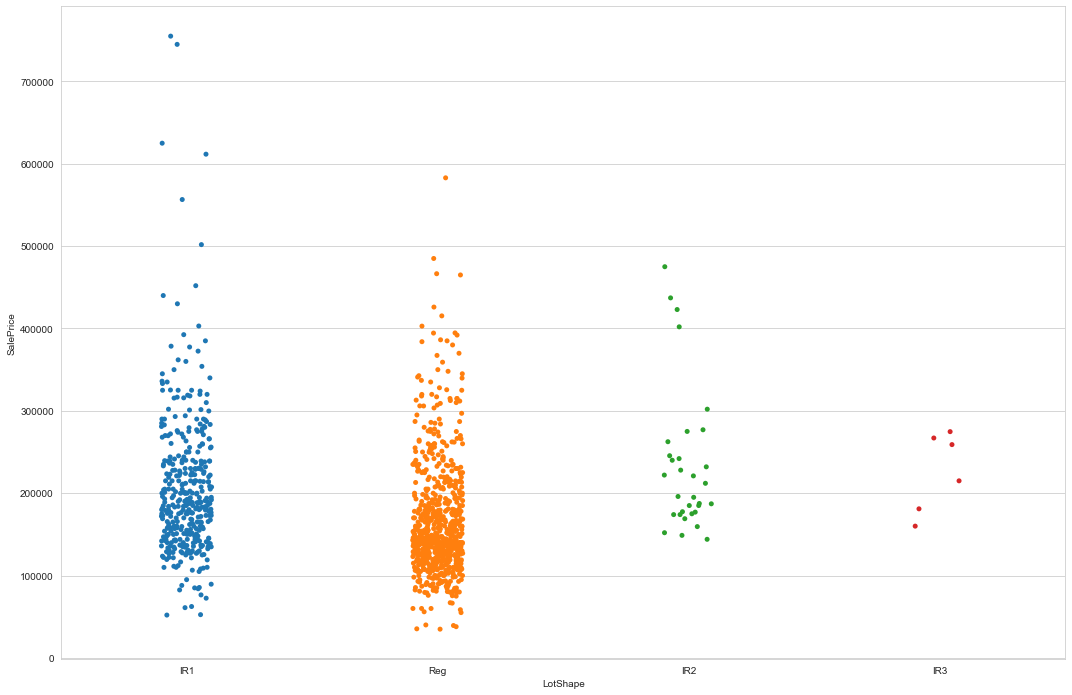

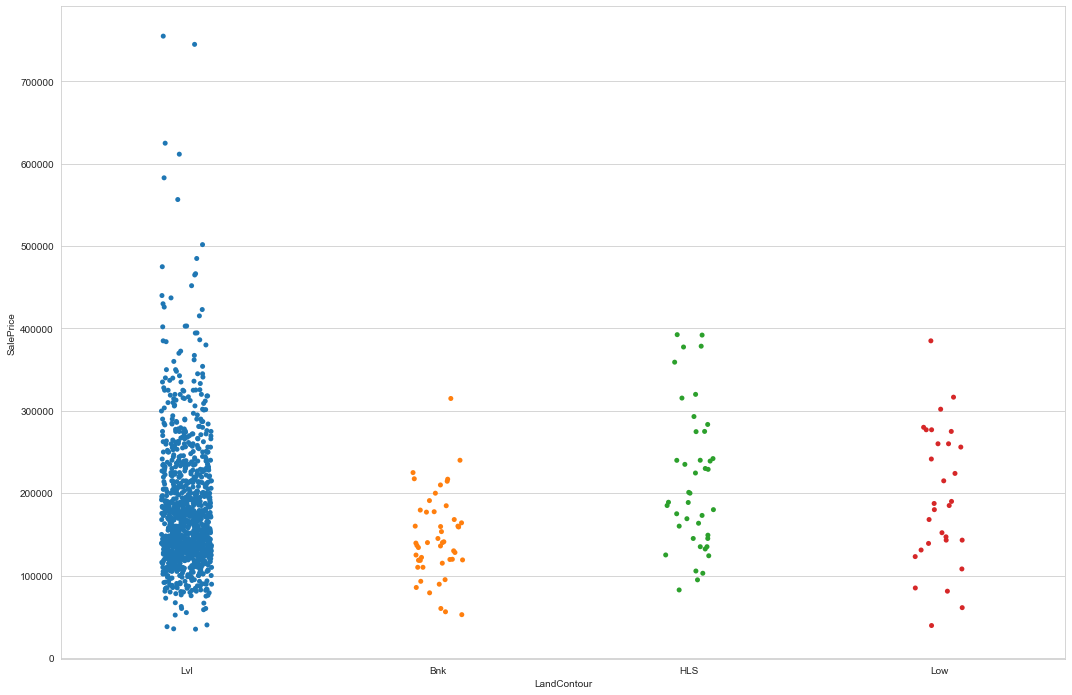

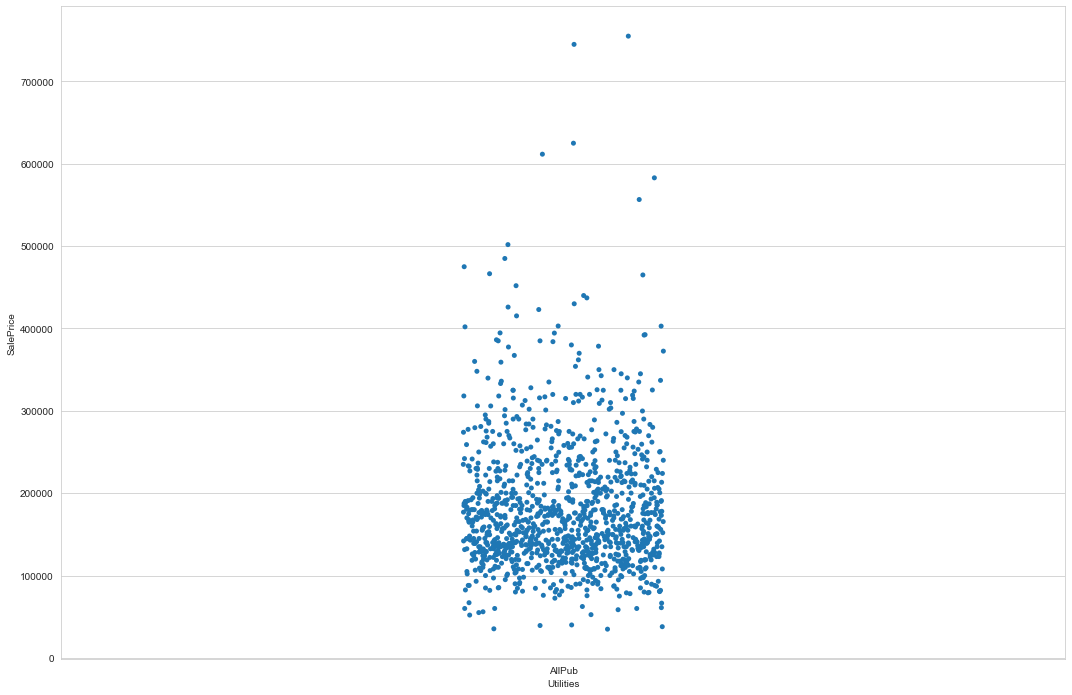

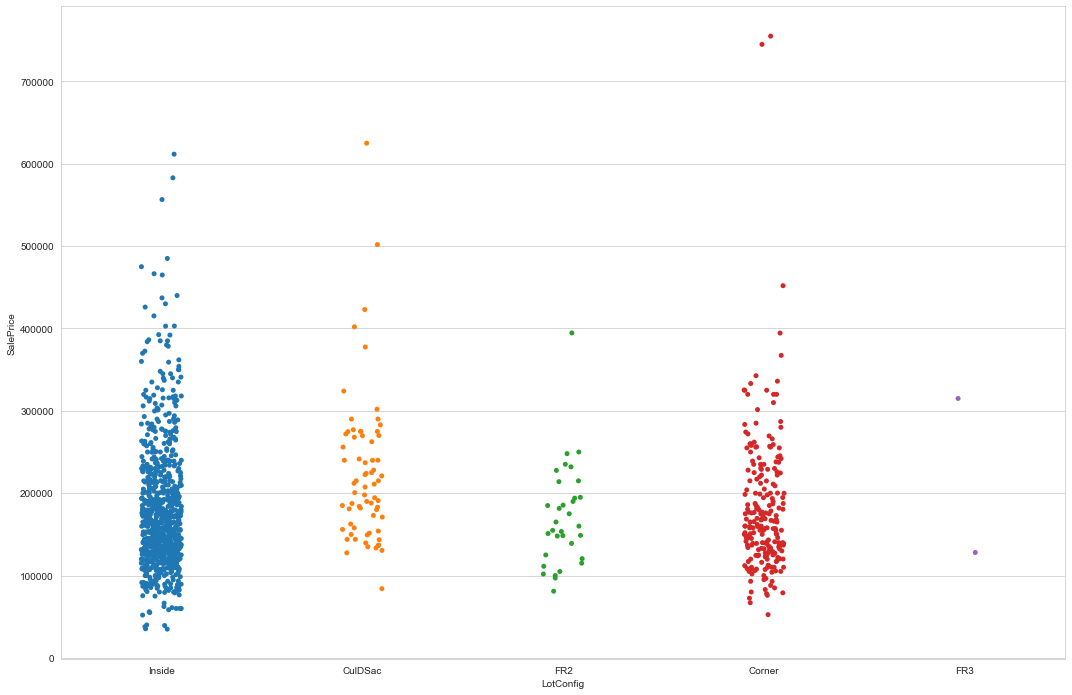

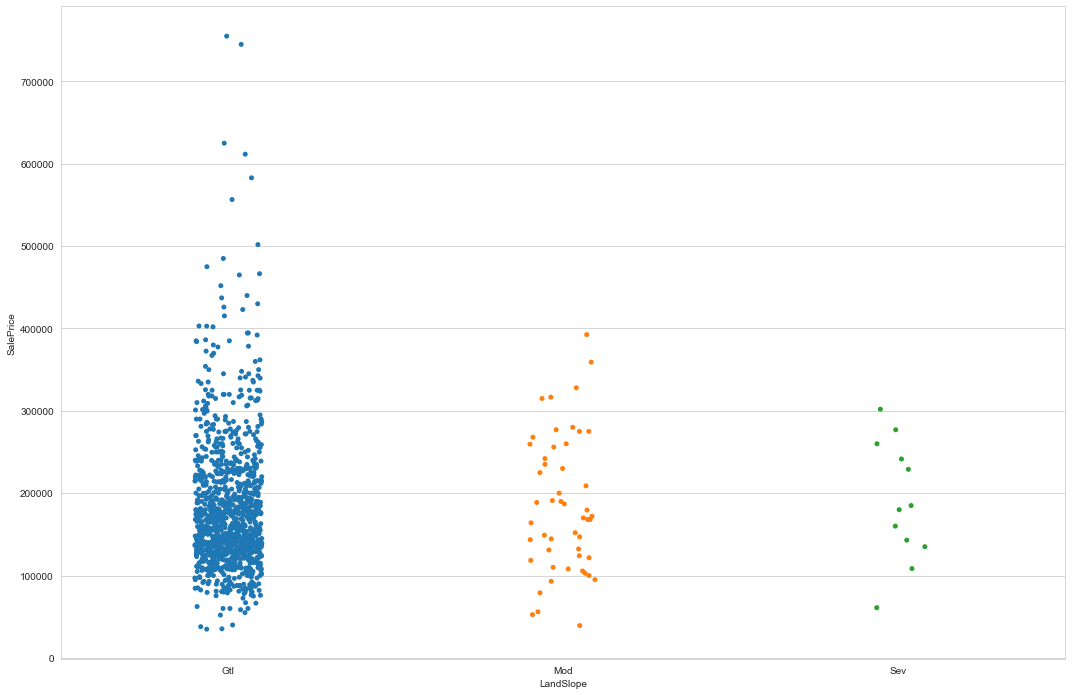

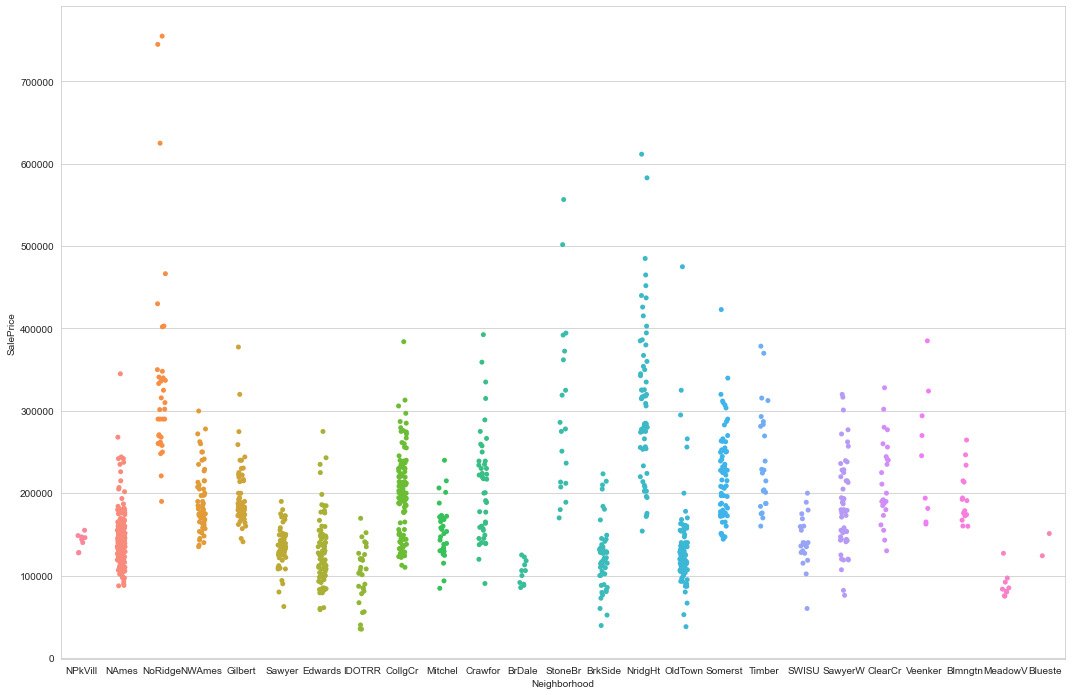

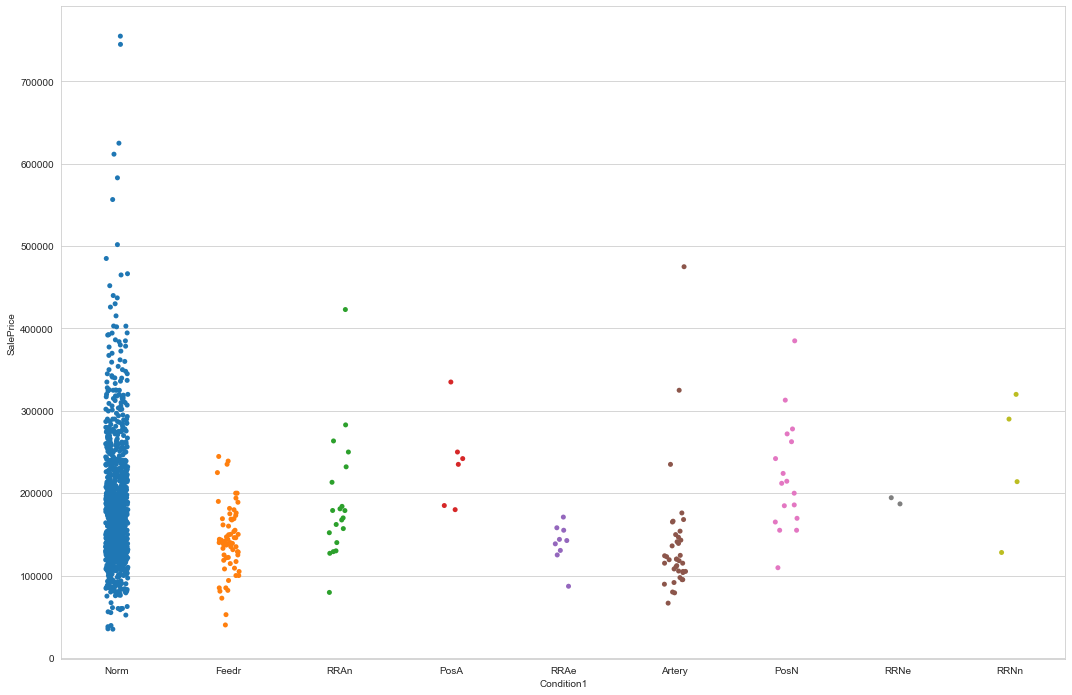

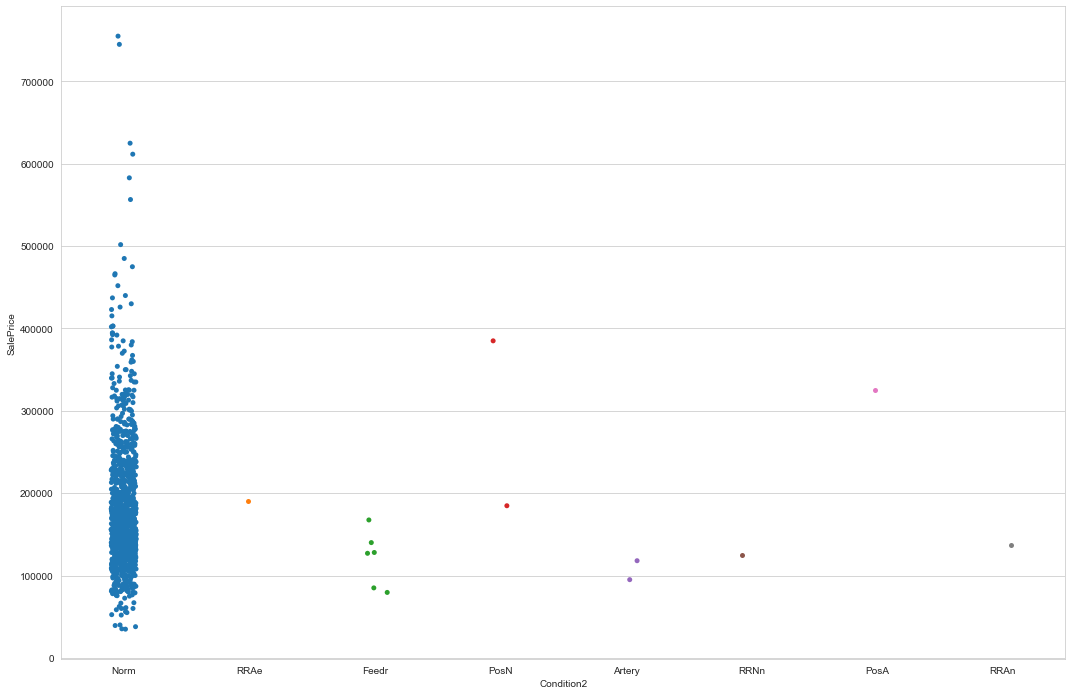

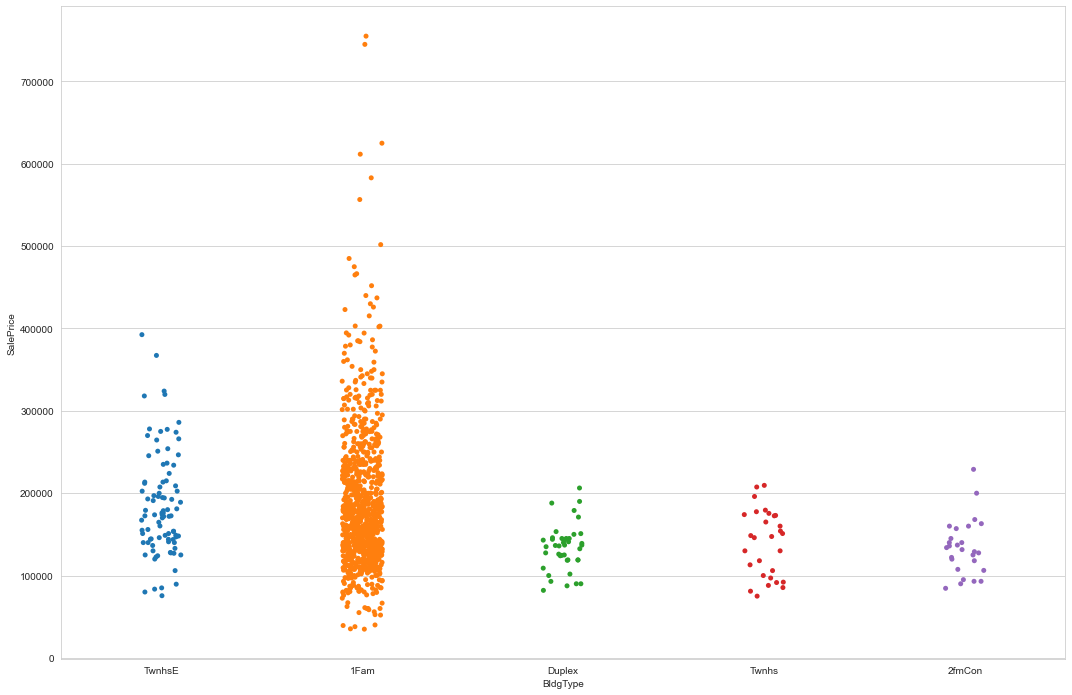

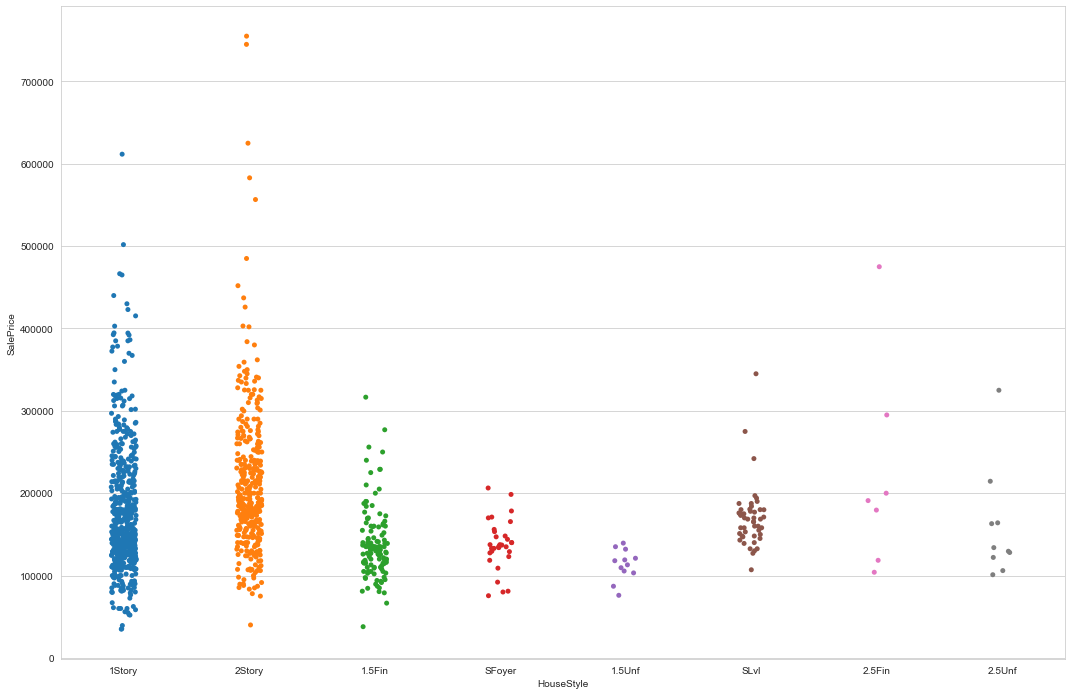

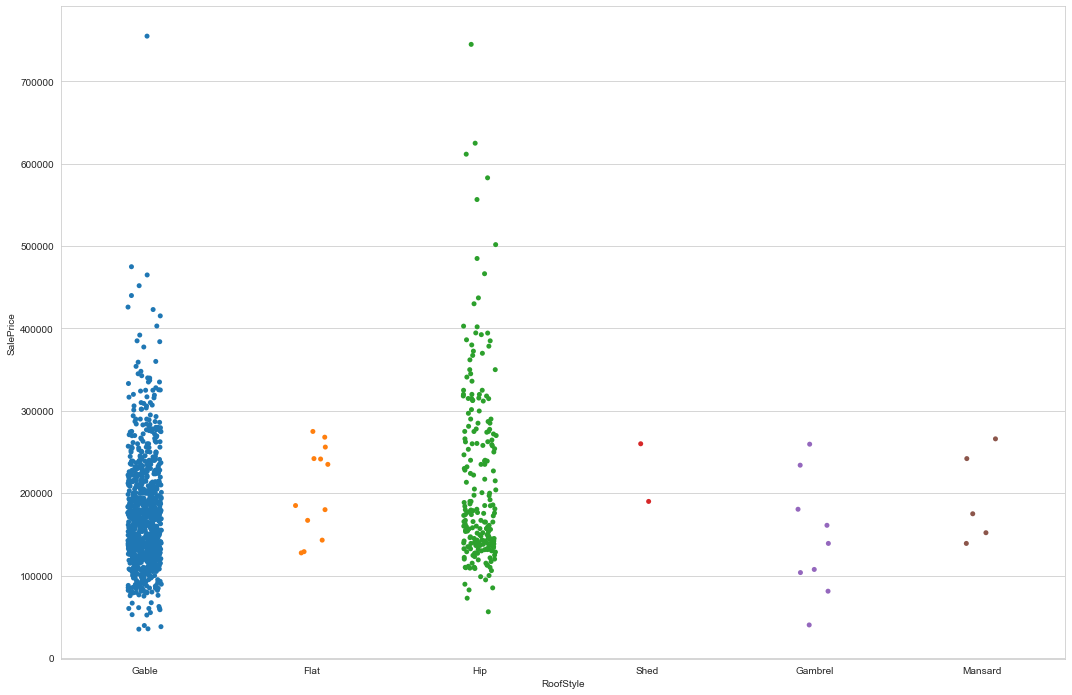

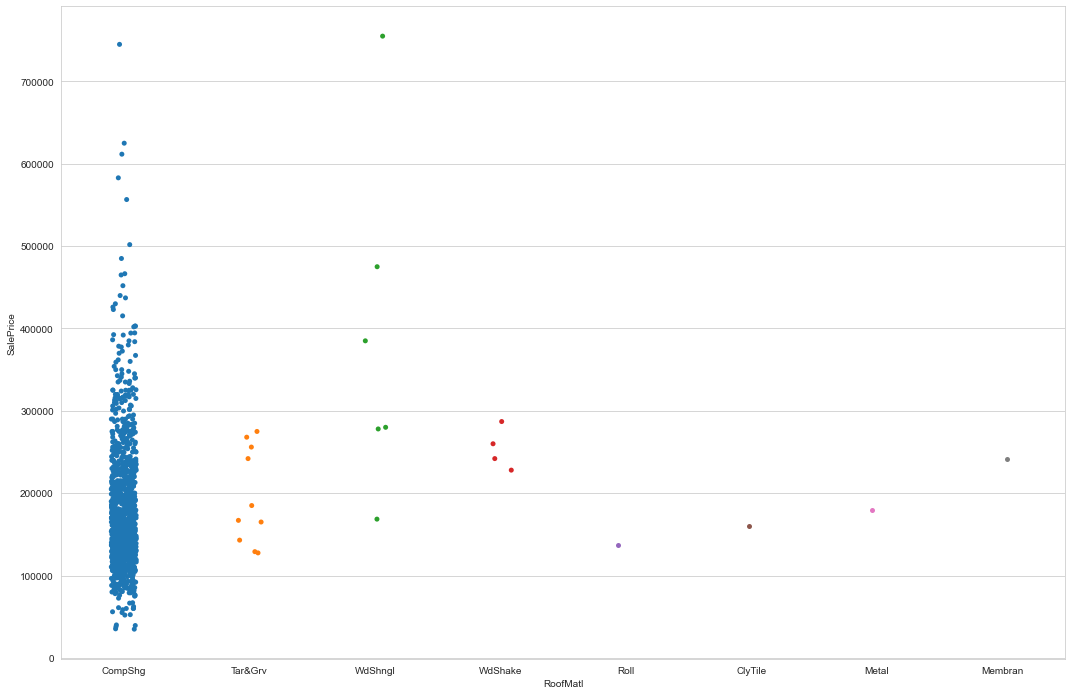

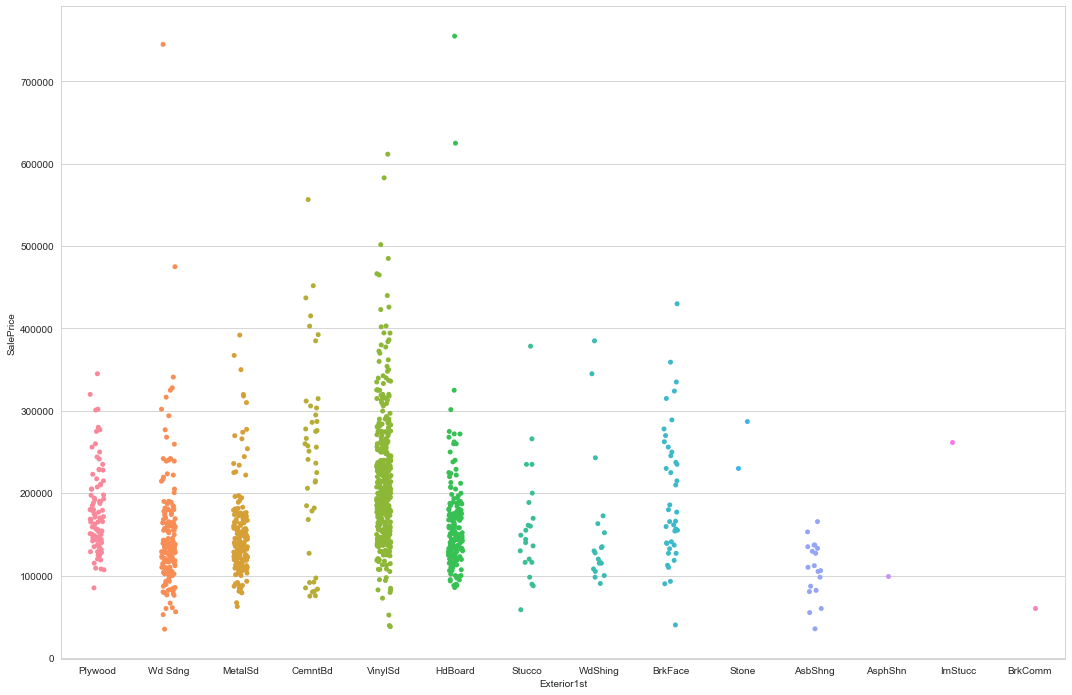

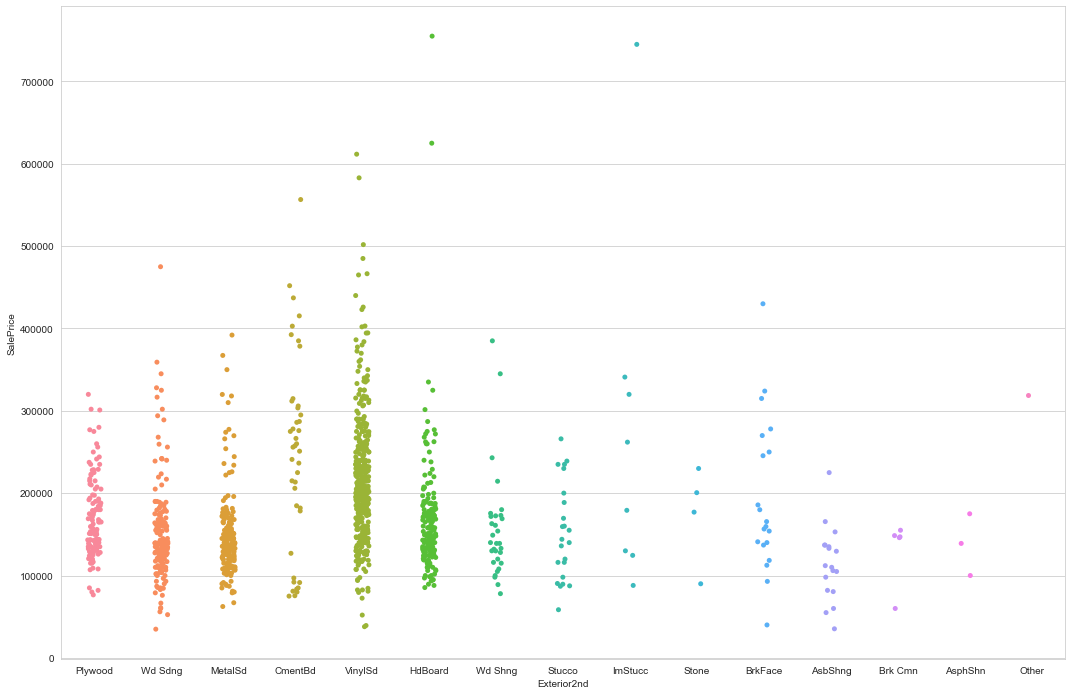

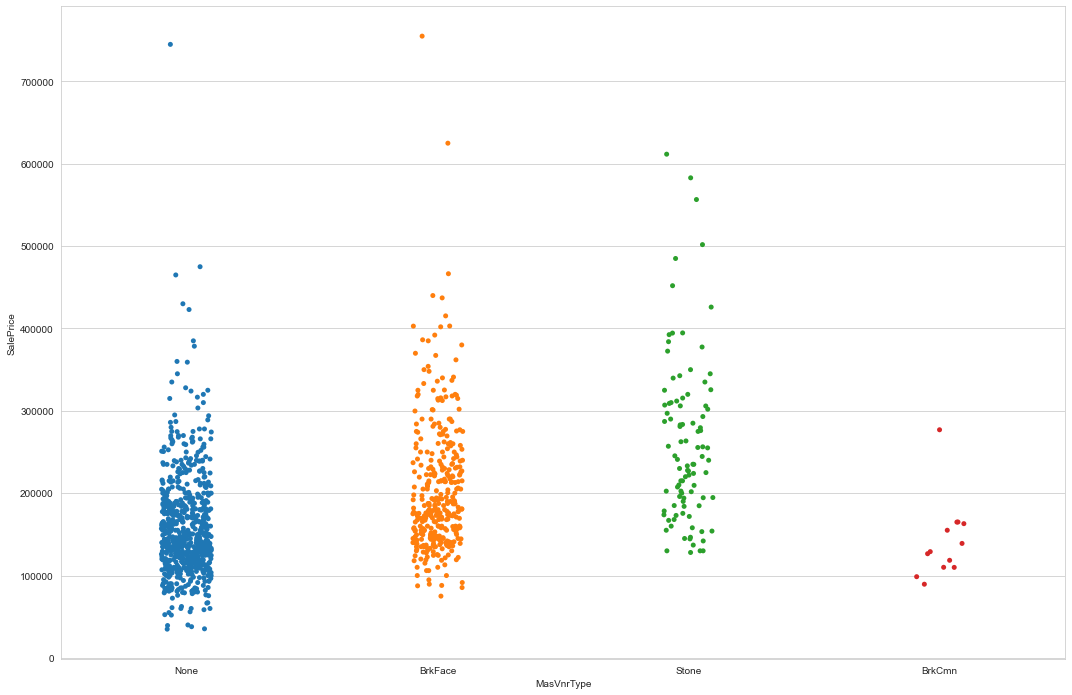

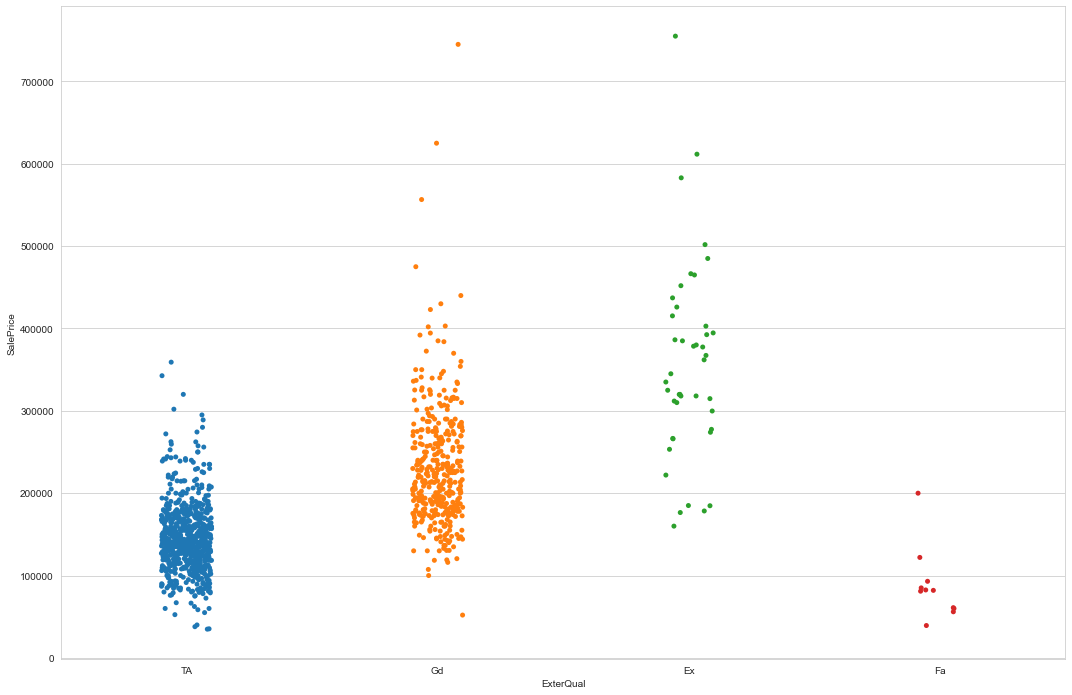

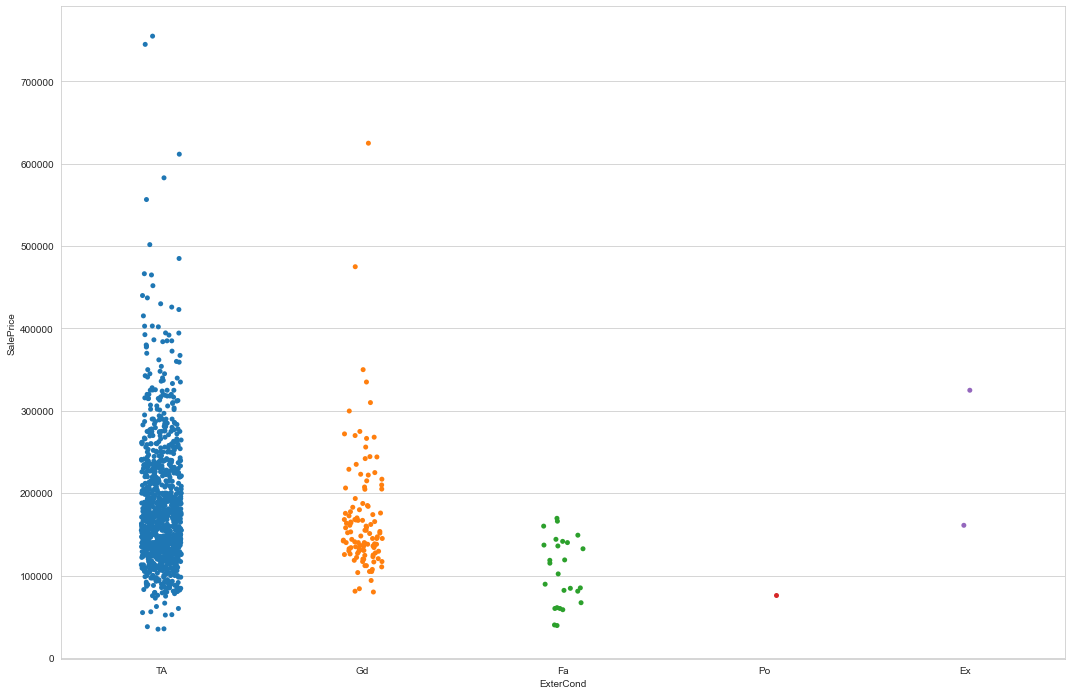

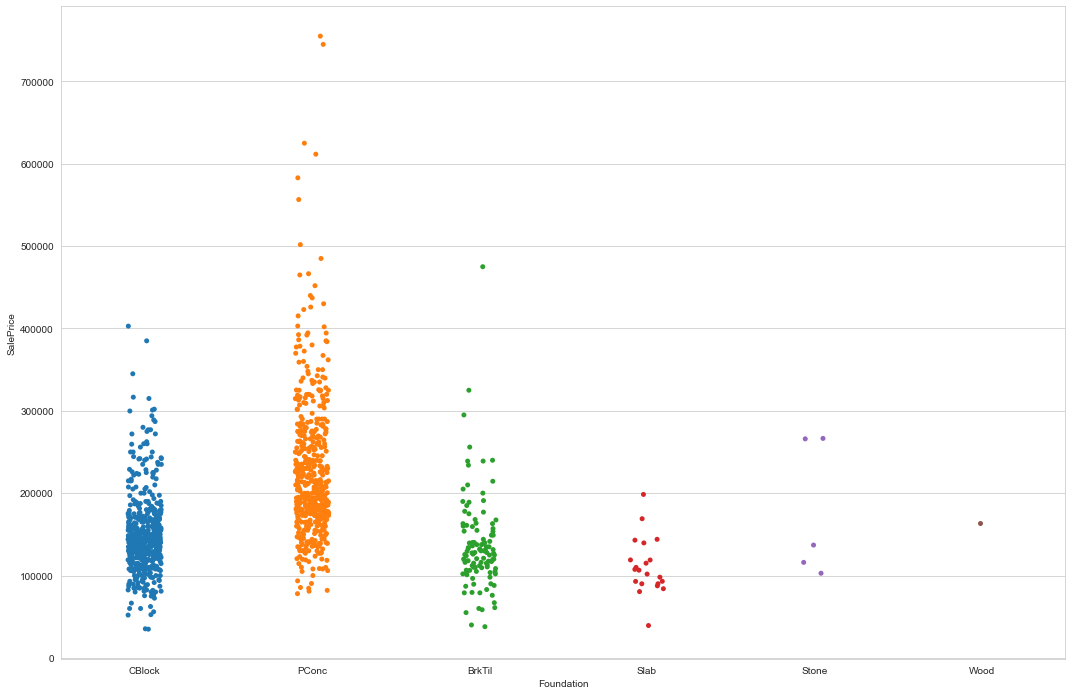

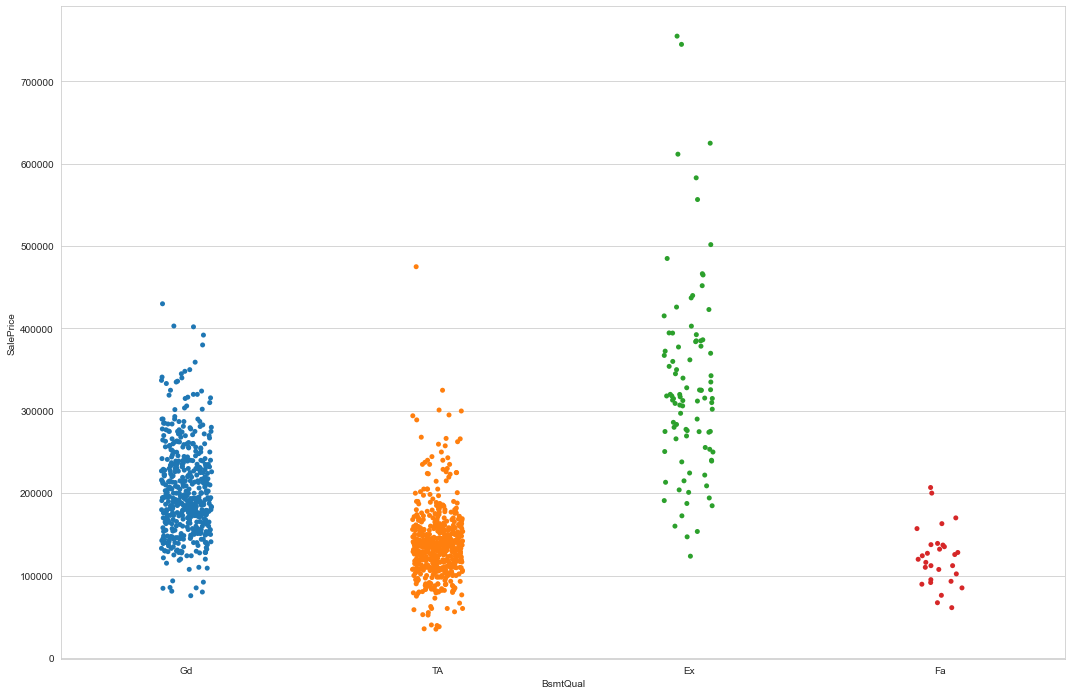

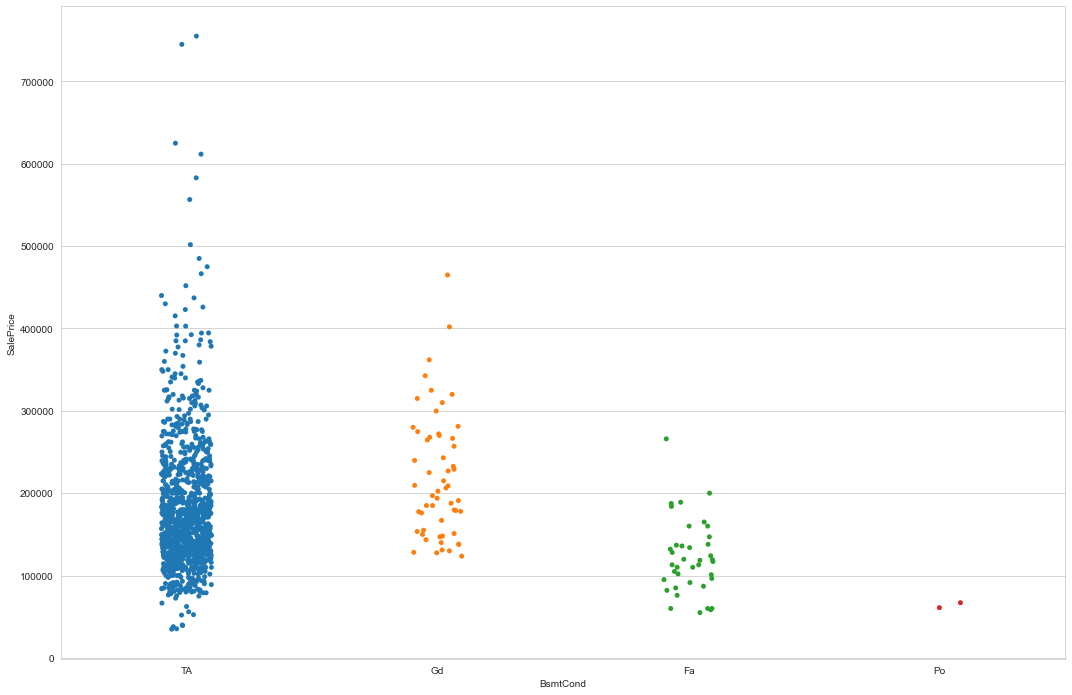

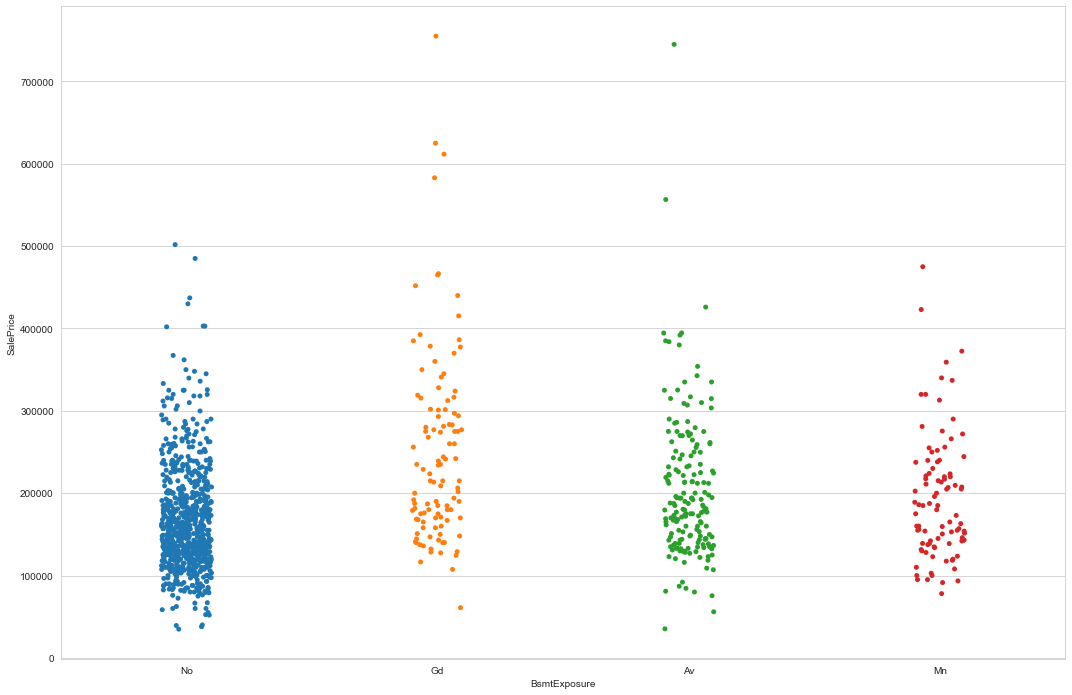

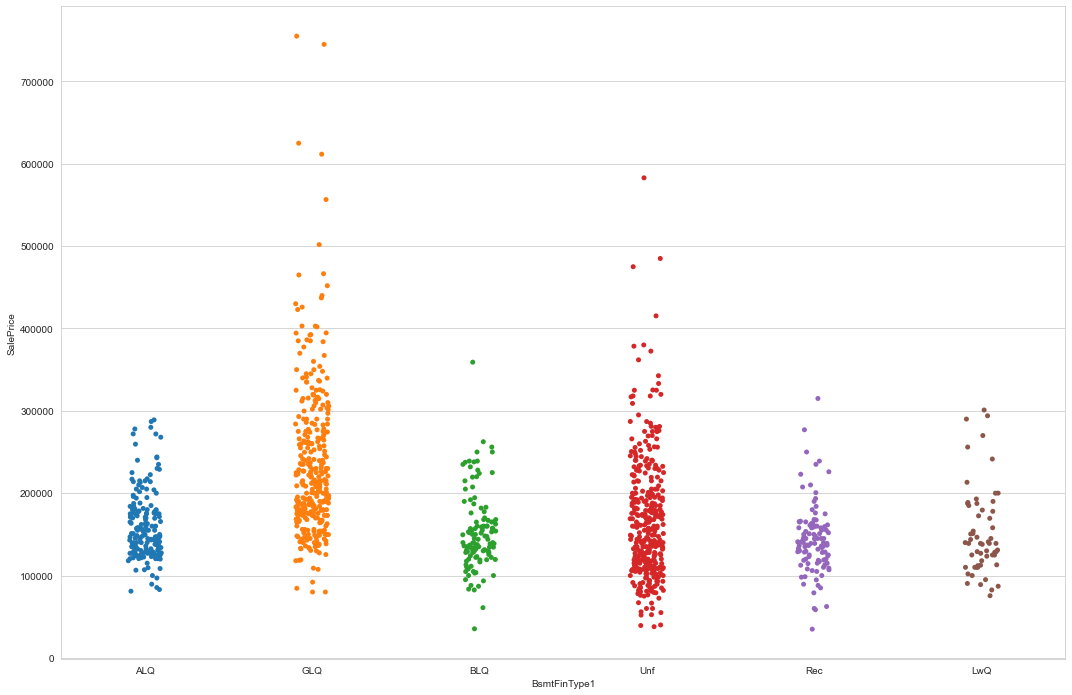

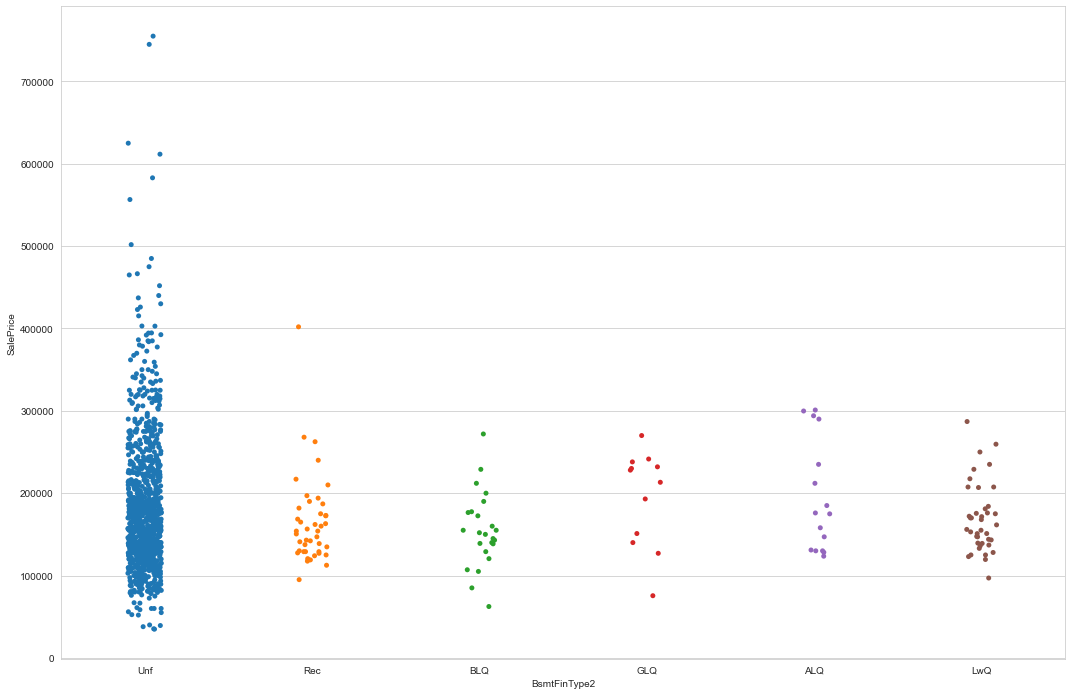

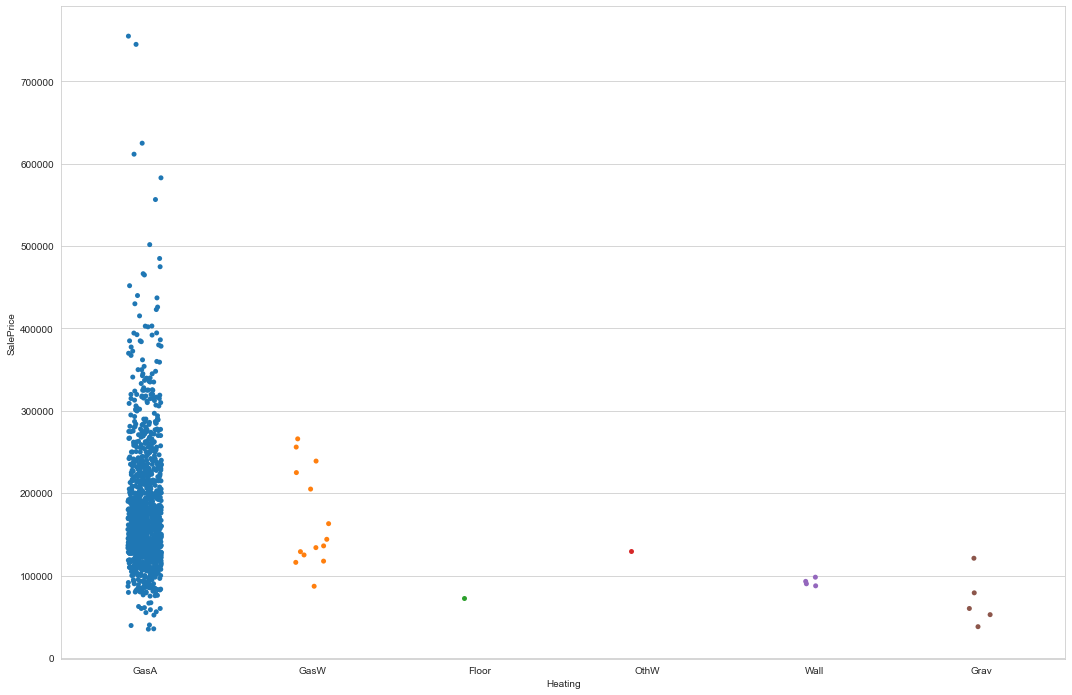

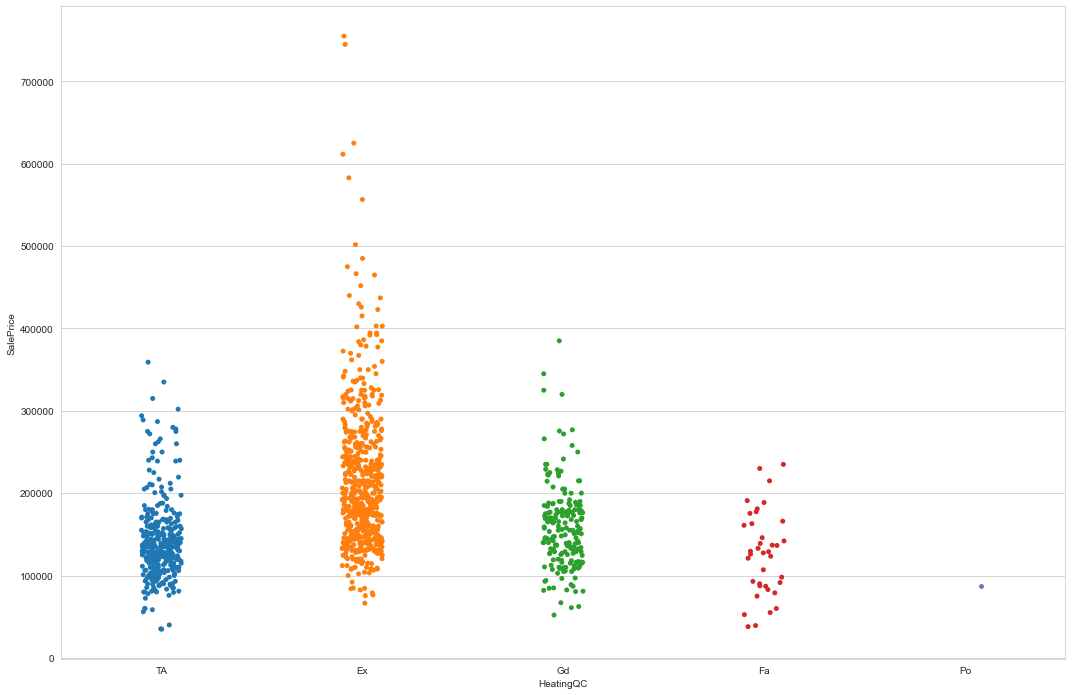

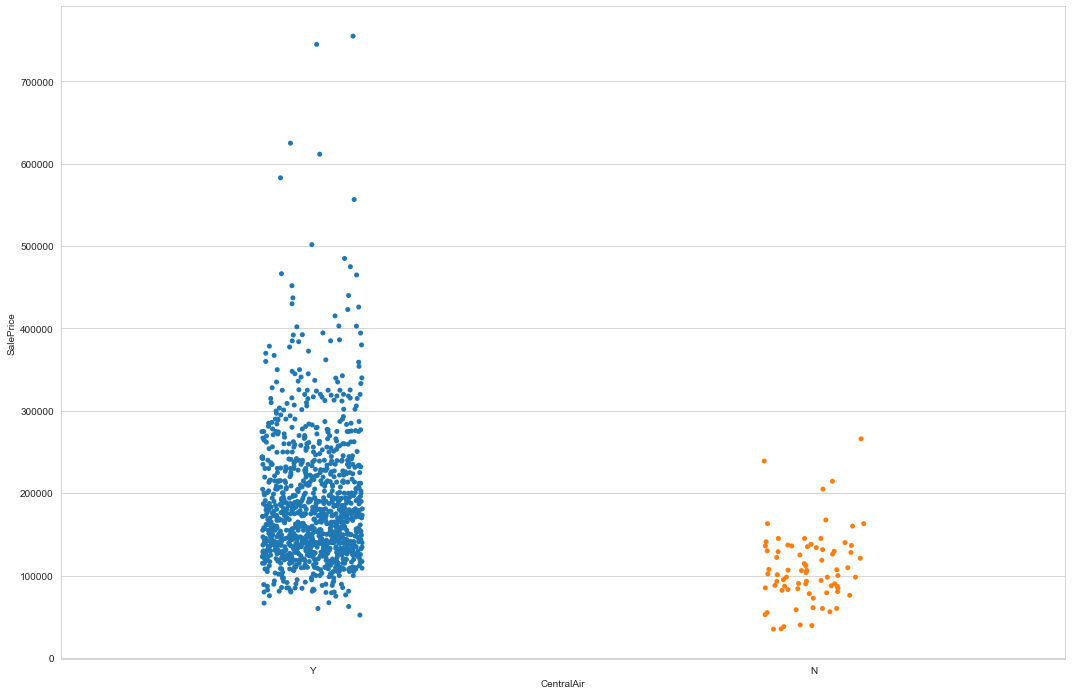

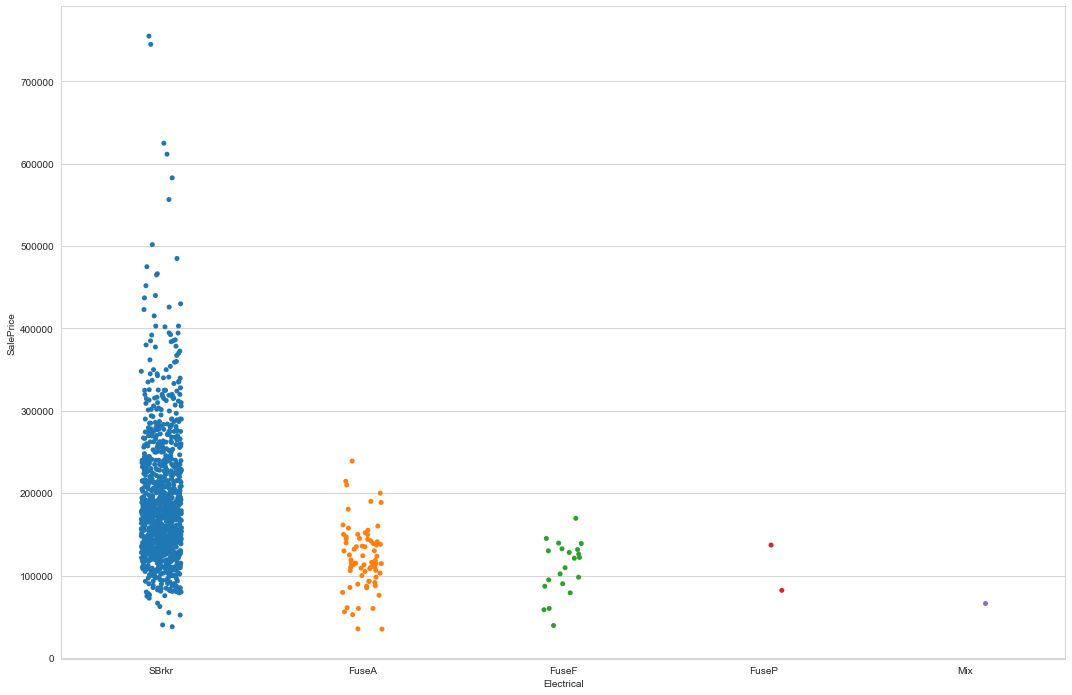

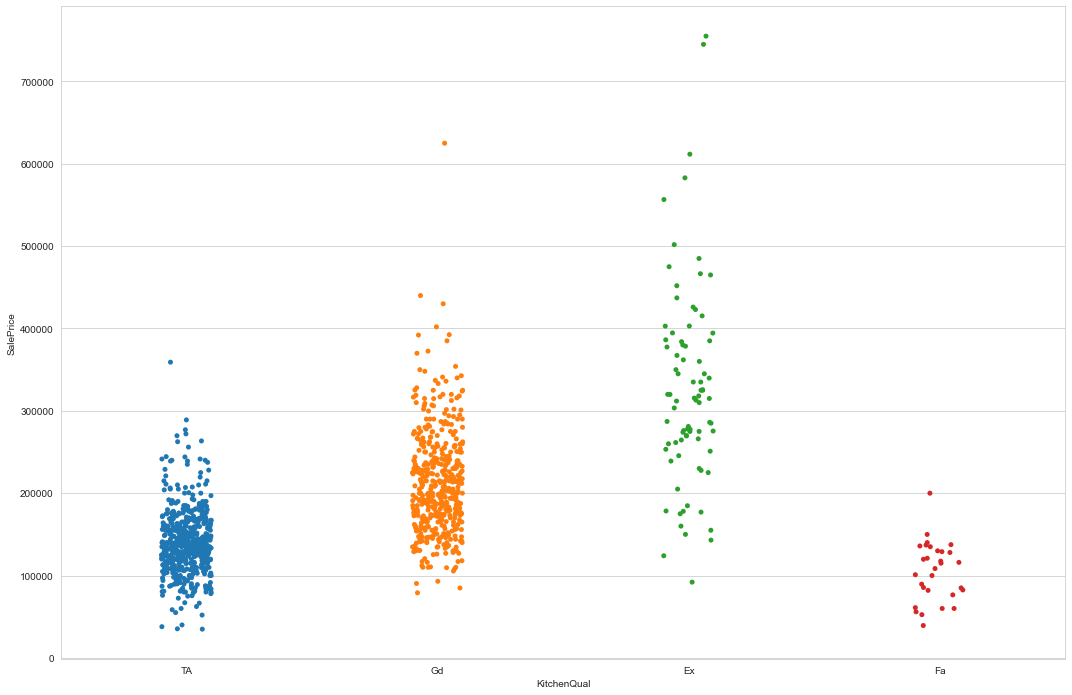

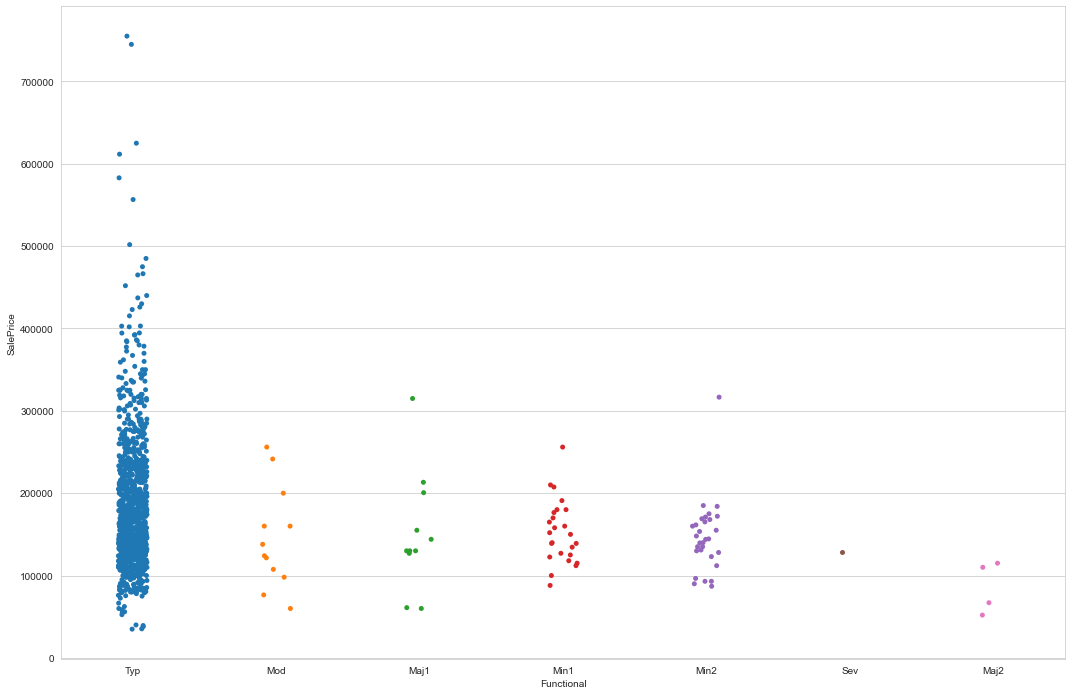

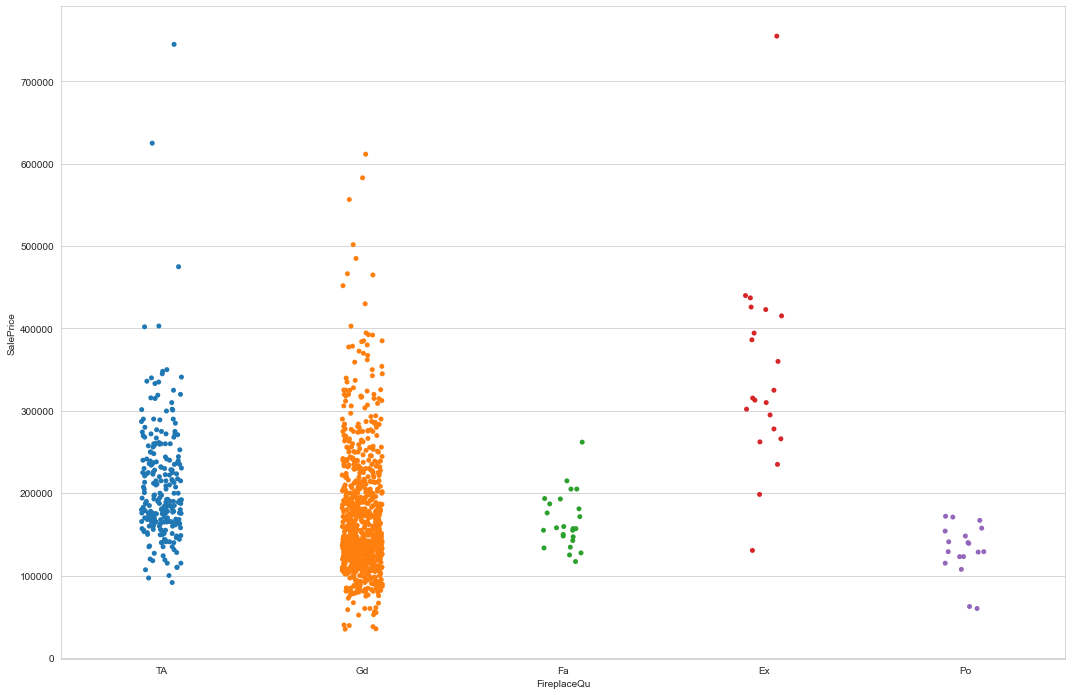

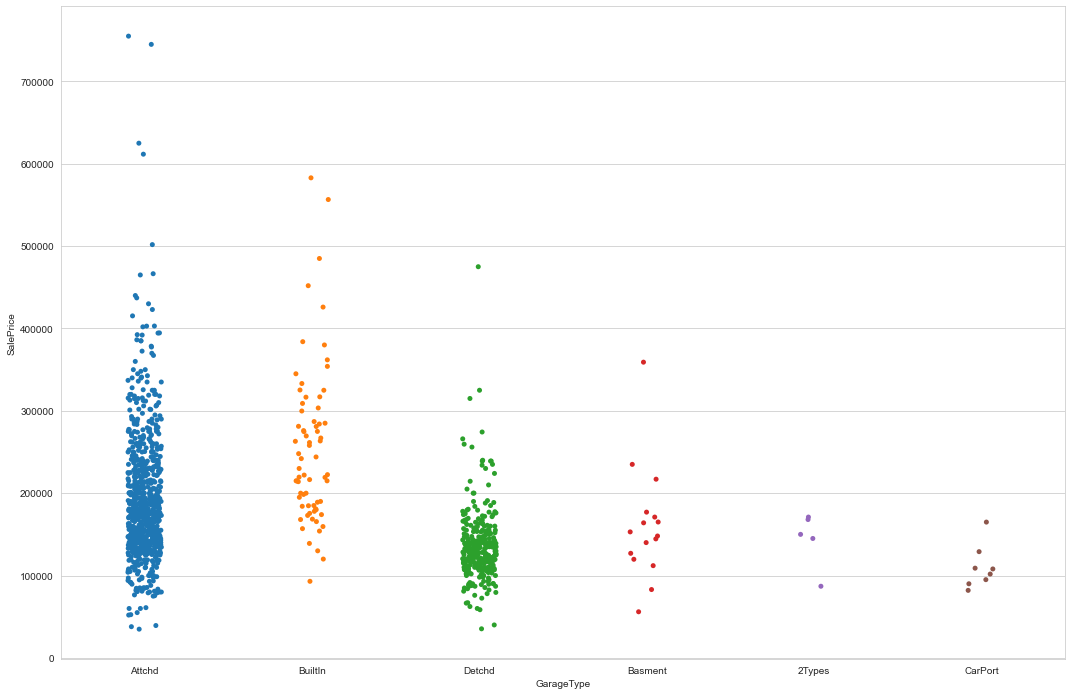

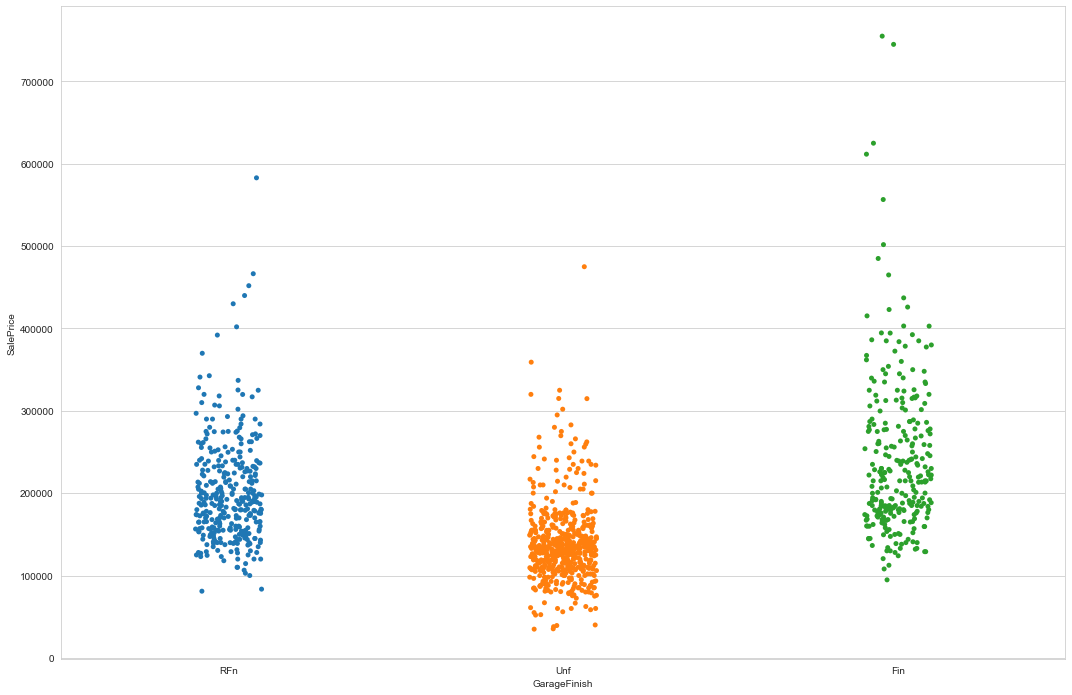

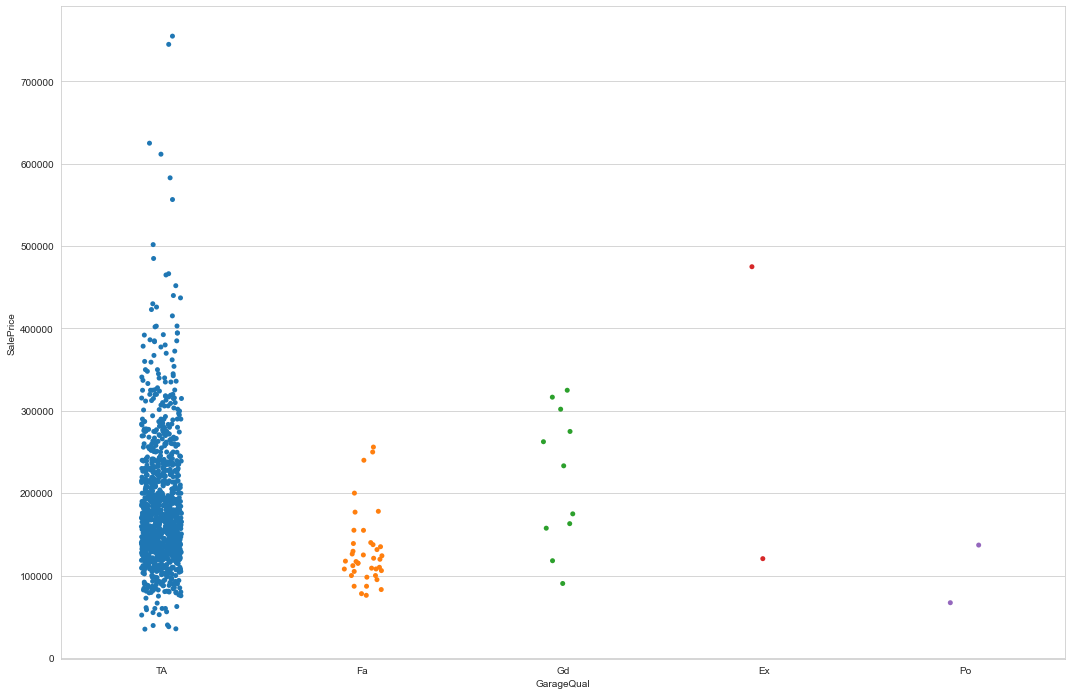

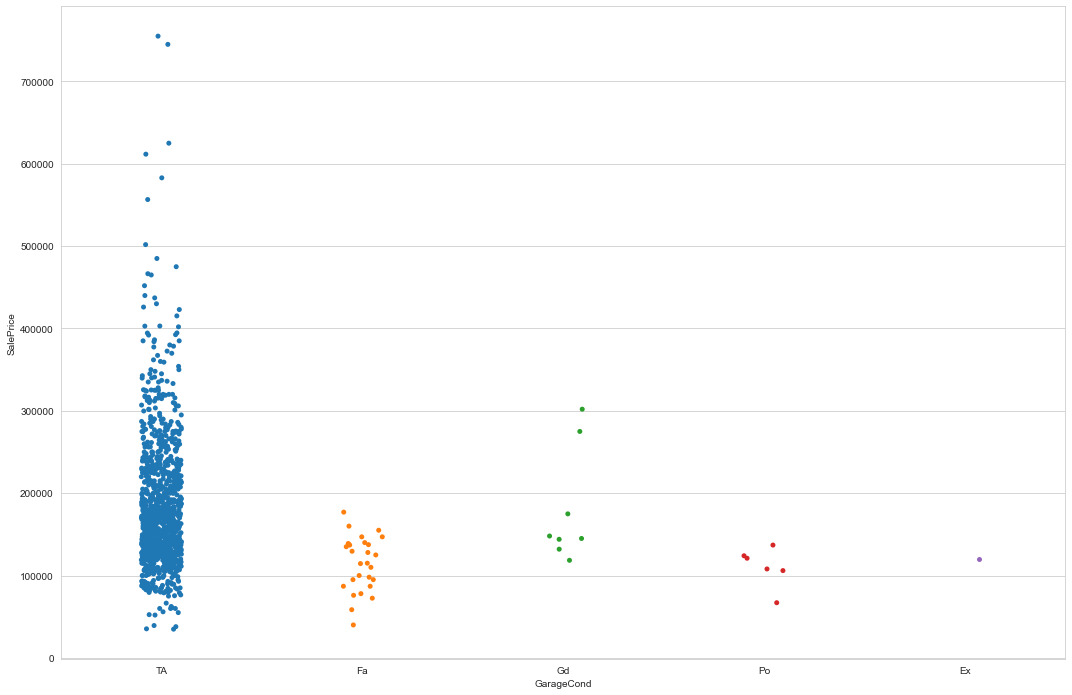

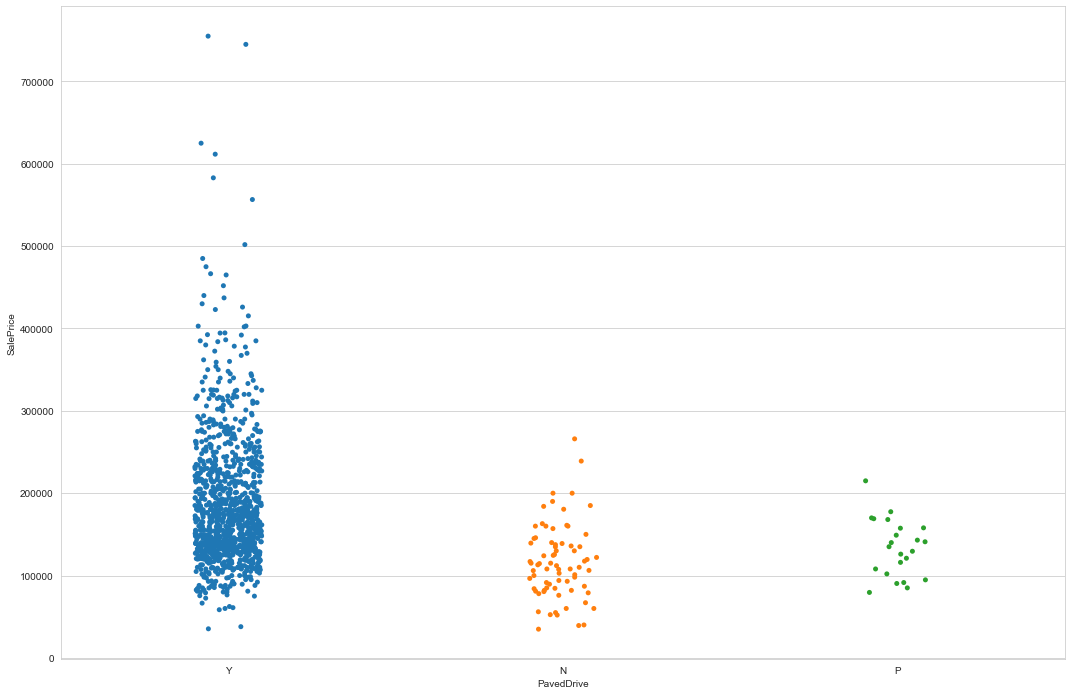

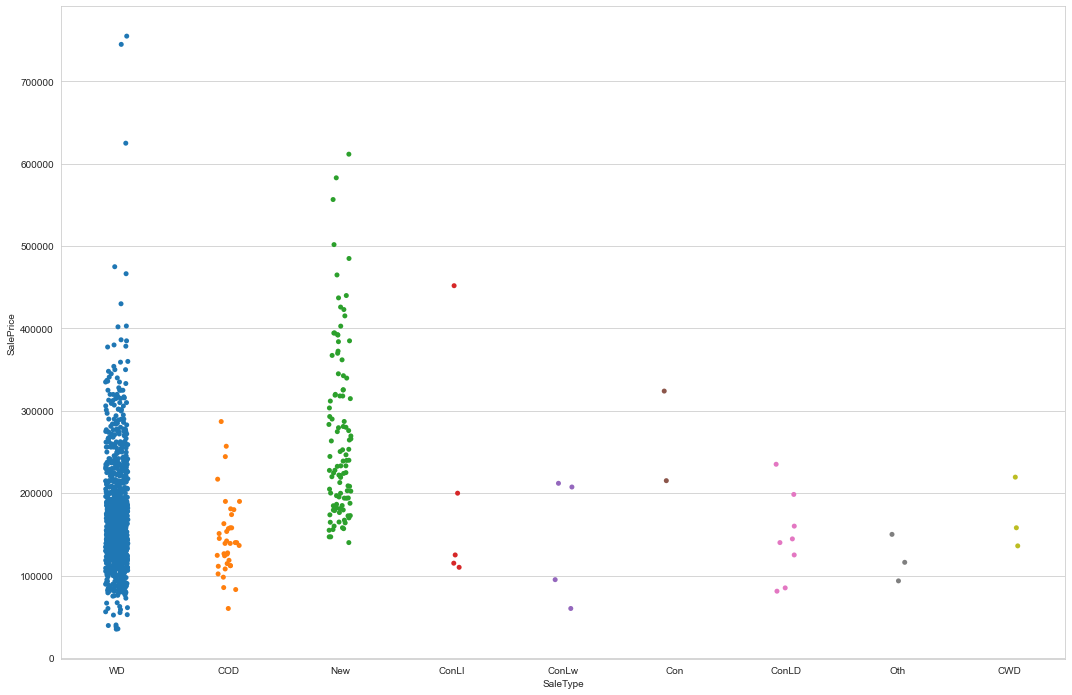

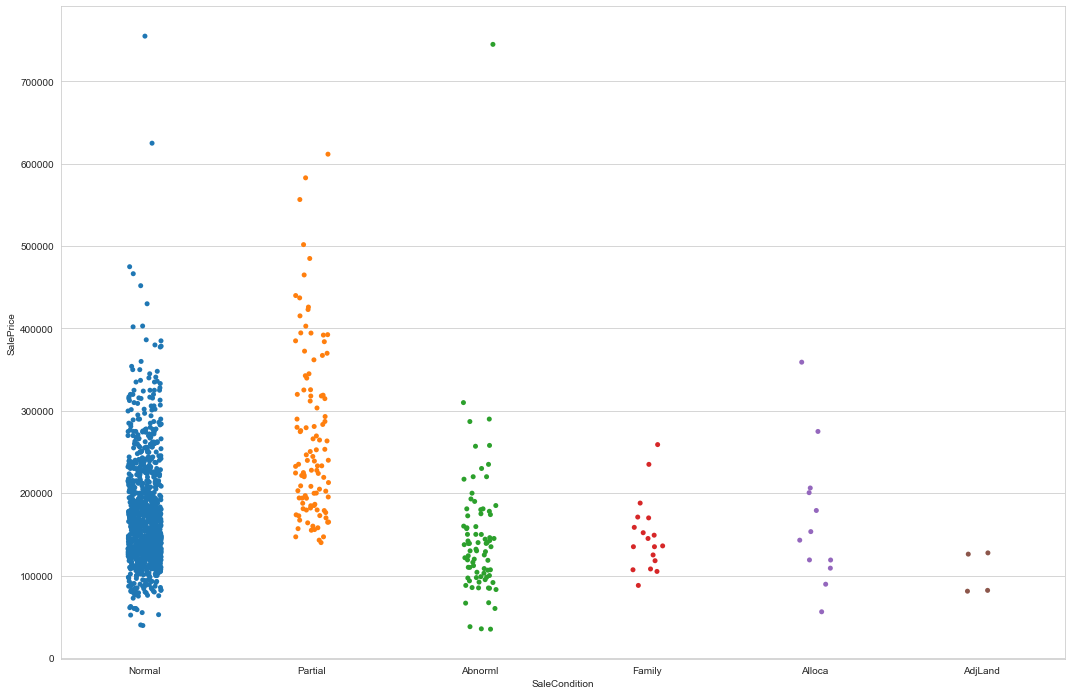

In [29]:
for i in df_str_types:
    plt.figure(figsize=(18,12))
    sns.set_style('whitegrid')
    sns.stripplot(x=i,y='SalePrice',data=df)
    plt.show()

In [30]:
df_int_types=[]
for i in df.columns:
    if df[i].dtypes == "int64" or "float64":
        df_int_types.append(i)
df_int_types

['MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',

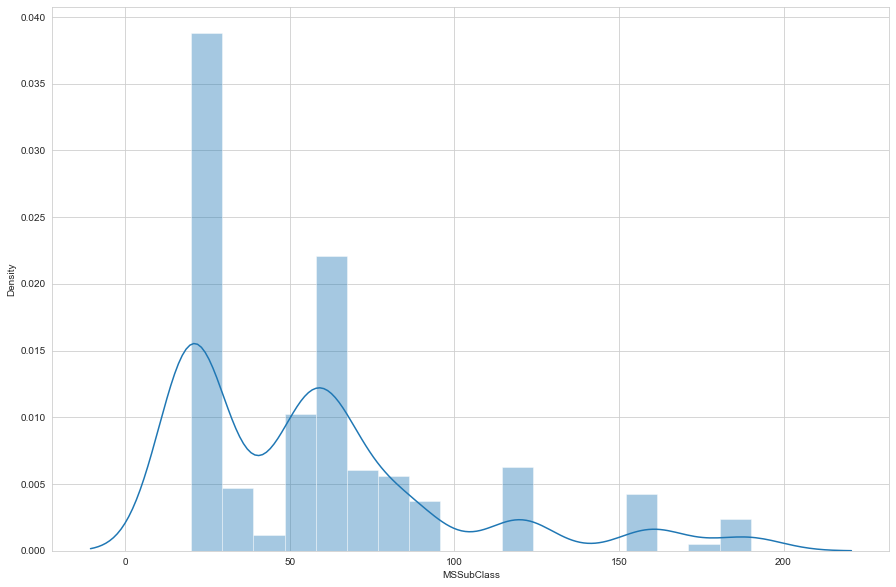

In [31]:
df_int_types=['MSSubClass']

for i in df_int_types:
    plt.figure(figsize=(15,10))
    sns.set_style('whitegrid')
    sns.distplot(df[i])
    plt.show()

Majorly type of dwelling are 20, 50 and 60.




In [34]:
#Label Encoding
df_object_list=[]
for i in df.columns:
    if df[i].dtypes == "object":
        df_object_list.append(i)


In [35]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
for i in df_object_list:
    df[i]=LE.fit_transform(df[i])
    print(df[i].value_counts().sort_index())

In [36]:
## We will drop utilities column as it has only single type of value.
df.drop("Utilities", axis=1, inplace=True)

MSSubClass         AxesSubplot(0.125,0.816017;0.0824468x0.0639831)
MSZoning         AxesSubplot(0.223936,0.816017;0.0824468x0.0639...
LotFrontage      AxesSubplot(0.322872,0.816017;0.0824468x0.0639...
LotArea          AxesSubplot(0.421809,0.816017;0.0824468x0.0639...
Street           AxesSubplot(0.520745,0.816017;0.0824468x0.0639...
                                       ...                        
MoSold           AxesSubplot(0.619681,0.20178;0.0824468x0.0639831)
YrSold           AxesSubplot(0.718617,0.20178;0.0824468x0.0639831)
SaleType         AxesSubplot(0.817553,0.20178;0.0824468x0.0639831)
SaleCondition         AxesSubplot(0.125,0.125;0.0824468x0.0639831)
SalePrice          AxesSubplot(0.223936,0.125;0.0824468x0.0639831)
Length: 74, dtype: object

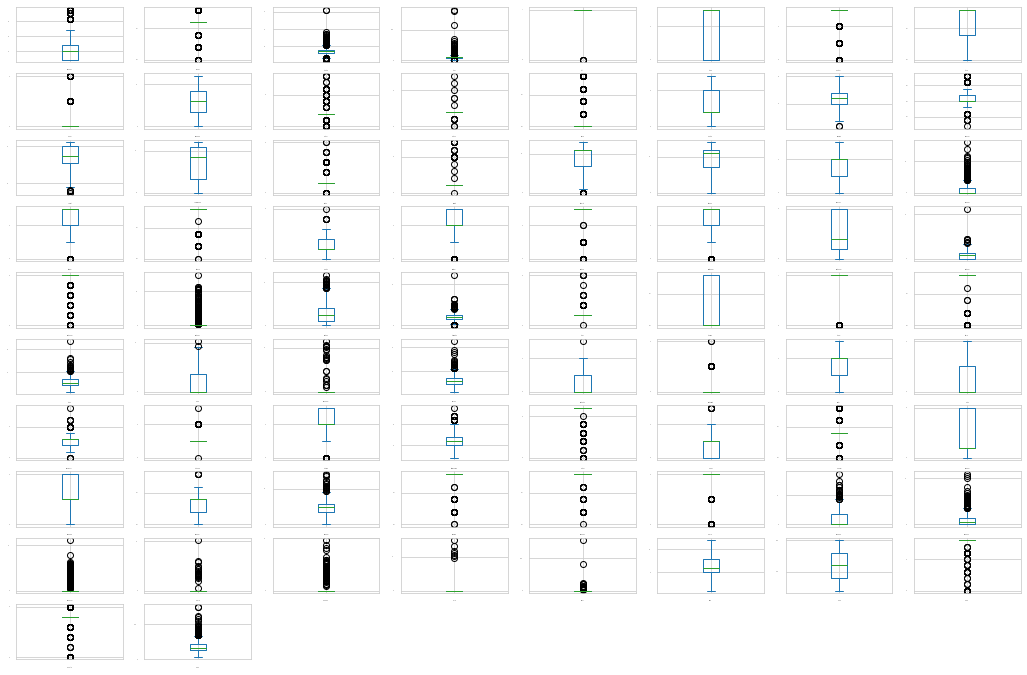

In [37]:
#Plotting Outliers
df.plot(kind='box',subplots=True,layout=(10,8),sharex=False,fontsize=1,figsize=(18,12))

In [38]:
#Outliers Removal
from scipy.stats import zscore
z=np.abs(zscore(df))
z

MSSubClass  MSZoning  LotFrontage   LotArea    Street  LotShape  \
0       1.508301  0.021646     0.000000  0.620616  0.058621  1.373107   
1       0.877042  0.021646     1.070631  0.600903  0.058621  1.373107   
2       0.077095  0.021646     0.936867  0.063075  0.058621  1.373107   
3       0.877042  0.021646     1.516514  0.141424  0.058621  1.373107   
4       0.877042  0.021646     0.000000  0.686902  0.058621  1.373107   
...          ...       ...          ...       ...       ...       ...   
1163    0.877042  0.021646     0.000000  0.074355  0.058621  1.373107   
1164    0.877042  0.021646     0.177839  0.190733  0.058621  0.752055   
1165    2.462438  0.021646     2.095132  0.916362  0.058621  0.752055   
1166    0.315629  4.762117     0.935838  0.221670  0.058621  0.752055   
1167    0.077095  0.021646     0.000000  0.293038  0.058621  1.373107   

      LandContour  LotConfig  LandSlope  Neighborhood  Condition1  Condition2  \
0        0.318473   0.606420   0.226126      0.142224    0.037339    0.023979   
1        0.318473   0.606420   3.295414      0.024227    0.037339    0.023979   
2        0.318473   1.220661   0.226126      0.475125    0.037339    0.023979   
3        0.318473   0.606420   0.226126      0.308675    0.037339    0.023979   
4        0.318473   0.611634   0.226126      0.308675    0.037339    0.023979   
...           ...        ...        ...           ...         ...         ...   
1163     0.318473   0.606420   0.226126      1.140927    0.037339    0.023979   
1164     0.318473   0.606420   0.226126      0.856479    1.185010    0.023979   
1165     0.318473   0.611634   0.226126      0.142224    0.037339    0.023979   
1166     0.318473   0.606420   0.226126      0.523578    1.185010    0.023979   
1167     0.318473   0.606420   0.226126      0.690029    0.037339    0.023979   

      BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0     2.985495    0.549930     0.075169     0.530217   0.168236      0.421565   
1     0.403288    0.549930     1.364138     0.359572   0.030885      0.710356   
2     0.403288    1.030838     0.644484     0.530217   0.831975      0.589202   
3     0.403288    0.549930     0.075169     0.359572   0.201423      0.373434   
4     0.403288    0.549930     0.075169     1.249361   0.201423      0.733598   
...        ...         ...          ...          ...        ...           ...   
1163  0.403288    0.549930     0.794823     0.530217   0.130446      0.854752   
1164  0.403288    0.549930     1.514476     0.530217   0.727811      0.877993   
1165  2.138299    1.030838     0.075169     0.359572   0.168236      0.421565   
1166  0.403288    1.030838     1.514476     1.420006   1.690232      1.672992   
1167  0.403288    1.030838     0.075169     0.530217   1.031096      0.877993   

      RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrType  MasVnrArea  \
0      0.483544  0.134573     0.212927     0.104890    0.395209    0.558343   
1      1.685203  6.090408     1.079014     1.050880    0.395209    0.558343   
2      0.483544  0.134573     0.535912     0.682775    0.395209    0.558343   
3      1.919773  0.134573     0.212927     0.104890    1.241686    2.076985   
4      0.483544  0.134573     1.504868     1.549602    2.032104    0.133430   
...         ...       ...          ...          ...         ...         ...   
1163   0.483544  0.134573     0.535912     0.682775    1.241686    0.388145   
1164   0.483544  0.134573     0.756029     0.761937    0.395209    0.558343   
1165   0.483544  0.134573     0.212927     2.127487    0.395209    0.558343   
1166   0.718115  0.134573     1.827853     1.838545    0.395209    0.558343   
1167   0.483544  0.134573     0.756029     0.761937    0.395209    0.558343   

      ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond  BsmtExposure  \
0      0.671093   0.369322    0.557836  0.329500  0.293234      0.635539   
1      0.759266   2.318331    0.852451  0.836731  2.672114      1.113129   
2     

In [39]:
threshold=3
print(np.where(z>3))

(array([   1,    1,    1, ..., 1166, 1166, 1166], dtype=int64), array([ 8, 19, 33, ..., 38, 60, 61], dtype=int64))


In [40]:
df_new=df[(z<3).all(axis=1)]
df_new.shape

(482, 74)

In [41]:
df.shape

(1168, 74)

In [42]:
((1168-468)/1168)*100

59.93150684931506

In [43]:
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1
df_new1=df[~((df<(Q1-1.5*IQR))|(df<(Q3+1.5*IQR))).any(axis=1)]
print("shape before and after")
print("shape before".ljust(20),":",df.shape)
print("shape after".ljust(20),":",df_new1.shape)

shape before and after
shape before         : (1168, 74)
shape after          : (0, 74)


In [44]:
print("Percentage Loss".ljust(20),":",(df.shape[0]-df_new1.shape[0])/df.shape[0])

Percentage Loss      : 1.0


In [45]:
df=df_new
df.shape

(482, 74)

In [46]:
#To check skewness
df.skew()

MSSubClass       1.250303
MSZoning         2.325272
LotFrontage      0.049920
LotArea          0.198824
Street           0.000000
                   ...   
MoSold           0.268020
YrSold           0.071870
SaleType        -3.192274
SaleCondition    1.588511
SalePrice        0.798563
Length: 74, dtype: float64

In [47]:
df_rs=['MSSubClass','MSZoning','BldgType','OverallCond','RoofStyle','MasVnrArea','BsmtFinSF2','BsmtUnfSF','HeatingQC','2ndFlrSF',
      'LowQualFinSF','FireplaceQu','GarageType','WoodDeckSF','OpenPorchSF','EnclosedPorch','ScreenPorch','MiscVal','SaleCondition']
for val in df_rs:
    if df.skew().loc[val]>0.55:
        df[val]=np.sqrt(df[val])
df.skew()

MSSubClass       0.693011
MSZoning         2.156852
LotFrontage      0.049920
LotArea          0.198824
Street           0.000000
                   ...   
MoSold           0.268020
YrSold           0.071870
SaleType        -3.192274
SaleCondition    1.319015
SalePrice        0.798563
Length: 74, dtype: float64

In [48]:
df_rs=['MSSubClass','MSZoning','BldgType','OverallCond','RoofStyle','MasVnrArea','BsmtFinSF2','2ndFlrSF',
      'LowQualFinSF','FireplaceQu','GarageType','EnclosedPorch','ScreenPorch','MiscVal','SaleCondition']
for val in df_rs:
    if df.skew().loc[val]>0.55:
        df[val]=np.sqrt(df[val])
df.skew()

MSSubClass       0.457521
MSZoning         2.044507
LotFrontage      0.049920
LotArea          0.198824
Street           0.000000
                   ...   
MoSold           0.268020
YrSold           0.071870
SaleType        -3.192274
SaleCondition    1.160250
SalePrice        0.798563
Length: 74, dtype: float64

In [49]:
df.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 74, dtype: int64

In [50]:
df_rs=['MSZoning','BldgType','OverallCond','RoofStyle','BsmtFinSF2',
      'LowQualFinSF','FireplaceQu','GarageType','EnclosedPorch','ScreenPorch','MiscVal','SaleCondition']
for val in df_rs:
    if df.skew().loc[val]>0.55:
        df[val]=np.sqrt(df[val])
df.skew()

MSSubClass       0.457521
MSZoning         1.979640
LotFrontage      0.049920
LotArea          0.198824
Street           0.000000
                   ...   
MoSold           0.268020
YrSold           0.071870
SaleType        -3.192274
SaleCondition    1.074359
SalePrice        0.798563
Length: 74, dtype: float64

In [51]:
df.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 74, dtype: int64

In [52]:
df_rs=['MSZoning','BldgType','OverallCond','RoofStyle','BsmtFinSF2',
      'LowQualFinSF','FireplaceQu','GarageType','EnclosedPorch','ScreenPorch','MiscVal','SaleCondition']
for val in df_rs:
    if df.skew().loc[val]>0.55:
        df[val]=np.sqrt(df[val])
df.skew()

MSSubClass       0.457521
MSZoning         1.944794
LotFrontage      0.049920
LotArea          0.198824
Street           0.000000
                   ...   
MoSold           0.268020
YrSold           0.071870
SaleType        -3.192274
SaleCondition    1.029729
SalePrice        0.798563
Length: 74, dtype: float64

In [53]:
df.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 74, dtype: int64

In [54]:
df_ls=['LandContour','LotConfig','Condition1','YearBuilt','YearRemodAdd','Exterior1st','Exterior2nd','ExterCond','Foundation',
     'BsmtQual','BsmtCond','BsmtExposure','BsmtFinType2','SaleType','PavedDrive','FireplaceQu','Functional',
       'KitchenQual','Electrical']
for val in df_ls:
    if df.skew().loc[val]<-0.55:
        df[val]=np.cbrt(df[val])
df.skew()

MSSubClass       0.457521
MSZoning         1.944794
LotFrontage      0.049920
LotArea          0.198824
Street           0.000000
                   ...   
MoSold           0.268020
YrSold           0.071870
SaleType        -3.756221
SaleCondition    1.029729
SalePrice        0.798563
Length: 74, dtype: float64

In [55]:
df_ls=['LandContour','LotConfig','Condition1','YearBuilt','YearRemodAdd','Exterior1st','Exterior2nd','ExterCond','Foundation',
     'BsmtQual','BsmtCond','BsmtExposure','BsmtFinType2','SaleType','PavedDrive','FireplaceQu','Functional',
       'KitchenQual','Electrical']
for val in df_ls:
    if df.skew().loc[val]<-0.55:
        df[val]=np.cbrt(df[val])

        
df_ls=['LandContour','LotConfig','Condition1','YearBuilt','YearRemodAdd','Exterior1st','Exterior2nd','ExterCond','Foundation',
     'BsmtQual','BsmtCond','BsmtExposure','BsmtFinType2','SaleType','PavedDrive','FireplaceQu','Functional',
       'KitchenQual','Electrical']
for val in df_ls:
    if df.skew().loc[val]<-0.55:
        df[val]=np.cbrt(df[val])

In [56]:
df.skew()

MSSubClass       0.457521
MSZoning         1.944794
LotFrontage      0.049920
LotArea          0.198824
Street           0.000000
                   ...   
MoSold           0.268020
YrSold           0.071870
SaleType        -4.103750
SaleCondition    1.029729
SalePrice        0.798563
Length: 74, dtype: float64

In [57]:
df.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 74, dtype: int64

In [58]:
#Dropping of Columns
#We will remove PavedDrive , LowQualFinSF, Electrical, Exterior2nd and Exterior1st columns because their skewness is very high.

df.drop(['PavedDrive','LowQualFinSF', 'Electrical', 'Exterior2nd', 'Exterior1st'], axis=1,inplace=True)
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional',
       'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars',
       'GarageArea', 'GarageQual', 'GarageCond', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold

In [59]:
x=df[['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', '1stFlrSF', '2ndFlrSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SaleType', 'SaleCondition']]

y=df['SalePrice']
x.head()

MSSubClass  MSZoning  LotFrontage  LotArea  Street  LotShape  LandContour  \
0     3.309751  1.071075     70.98847     4928       1         0     1.041528   
2     2.783158  1.071075     92.00000     9920       1         0     1.041528   
5     2.783158  1.071075     58.00000    14054       1         0     1.041528   
6     2.114743  1.071075     70.98847    11341       1         0     1.041528   
11    2.783158  1.071075     44.00000     9548       1         0     1.041528   

    LotConfig  LandSlope  Neighborhood  Condition1  Condition2  BldgType  \
0    1.052685          0            13    1.026004           2  1.090508   
2    1.000000          0            15    1.026004           2  0.000000   
5    1.052685          0             8    1.026004           2  0.000000   
6    1.052685          0            19    1.026004           2  0.000000   
11   1.000000          0             5    1.026004           2  0.000000   

    HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd  RoofStyle  \
0            2            6     1.105823   1.324543      1.324543   1.000000   
2            5            7     1.105823   1.325037      1.325062   1.000000   
5            5            7     1.105823   1.325283      1.325283   1.000000   
6            2            5     1.118496   1.324069      1.325037   1.071075   
11           5            7     1.118496   1.325209      1.325209   1.000000   

    RoofMatl  MasVnrType  MasVnrArea  ExterQual  ExterCond  Foundation  \
0          1           2    0.000000          3   1.052685    1.000000   
2          1           2    0.000000          2   1.052685    1.026004   
5          1           2    0.000000          2   1.052685    1.026004   
6          1           1    3.662842          3   1.052685    1.000000   
11         1           1    3.864348          2   1.052685    1.026004   

    BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  \
0   1.026004  1.041528      1.041528             0         120      1.061421   
2   1.026004  1.041528      0.000000             2         862      1.061421   
5   1.026004  1.041528      0.000000             5           0      1.061421   
6   1.026004  1.041528      1.041528             0        1302      1.061421   
11  1.026004  1.041528      1.041528             2         483      1.061421   

    BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  Heating  HeatingQC  CentralAir  \
0          0.0  30.951575         1078        1        2.0           1   
2          0.0  15.968719         1117        1        0.0           1   
5          0.0  29.647934          879        1        0.0           1   
6          0.0   9.486833         1392        1        2.0           1   
11         0.0  21.400935          941        1        0.0           1   

    1stFlrSF  2ndFlrSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  \
0        958  0.000000        958             0             0         2   
2       1127  5.455800       2013             1             0         2   
5        879  5.600783       1863             0             0         2   
6       1392  0.000000       1392             1             0         1   
11       941  5.458876       1829             1             0         2   

    HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  \
0          0             2             1     1.041528             5   
2          1             3             1     1.041528             8   
5          1             4             1     1.026004             9   
6          1             3             1     1.041528             5   
11         1             3             1     1.026004             7   

    Functional  Fireplaces  FireplaceQu  GarageType  GarageFinish  GarageCars  \
0     1.068613           1     1.026004    1.000000             1           2   
2     1.068613           1     1.026004    1.000000             2           2   
5     1.068613           1     1.012919    1.071075             0           3   
6     

In [60]:
#Scaling of Data
from sklearn.preprocessing import StandardScaler
SC=StandardScaler()
x=SC.fit_transform(x)
x

array([[ 1.55217458, -0.29881425,  0.02906689, ..., -0.64160059,
         0.32480639, -0.25480097],
       [ 0.42400807, -0.29881425,  1.14191182, ..., -0.64160059,
         0.32480639, -0.25480097],
       [ 0.42400807, -0.29881425, -0.65884837, ..., -1.37616468,
        -1.99422585,  2.5935039 ],
       ...,
       [-1.00799588, -0.29881425,  0.02906689, ...,  1.56209169,
         0.32480639, -0.25480097],
       [ 2.08093261, -0.29881425, -2.45960856, ...,  0.8275276 ,
         0.32480639, -0.25480097],
       [ 0.42400807, -0.29881425,  0.02906689, ..., -1.37616468,
         0.32480639, -0.25480097]])

In [61]:
x=pd.DataFrame(x)
x

0         1         2         3    4         5         6   \
0    1.552175 -0.298814  0.029067 -1.278517  0.0 -1.224954  0.198255   
1    0.424008 -0.298814  1.141912  0.204461  0.0 -1.224954  0.198255   
2    0.424008 -0.298814 -0.658848  1.432552  0.0 -1.224954  0.198255   
3   -1.007996 -0.298814  0.029067  0.626598  0.0 -1.224954  0.198255   
4    0.424008 -0.298814 -1.400338  0.093950  0.0 -1.224954  0.198255   
..        ...       ...       ...       ...  ...       ...       ...   
477 -1.007996 -0.298814  0.029067  0.599565  0.0 -1.224954  0.198255   
478  0.424008 -0.298814  0.029067  0.454594  0.0 -1.224954  0.198255   
479 -1.007996 -0.298814  0.029067  0.174456  0.0 -1.224954  0.198255   
480  2.080933 -0.298814 -2.459609 -2.065161  0.0  0.832286  0.198255   
481  0.424008 -0.298814  0.029067 -0.407208  0.0 -1.224954  0.198255   

           7    8         9         10   11        12        13        14  \
0    0.494441  0.0  0.240769  0.126491  0.0  2.463525 -0.685482 -0.220936   
1    0.366004  0.0  0.565386  0.126491  0.0 -0.408714  0.961041  0.591973   
2    0.494441  0.0 -0.570773  0.126491  0.0 -0.408714  0.961041  0.591973   
3    0.494441  0.0  1.214619  0.126491  0.0 -0.408714 -0.685482 -1.033844   
4    0.366004  0.0 -1.057699  0.126491  0.0 -0.408714  0.961041  0.591973   
..        ...  ...       ...       ...  ...       ...       ...       ...   
477  0.494441  0.0  2.026161  0.126491  0.0 -0.408714 -0.685482 -0.220936   
478  0.366004  0.0 -0.570773  0.126491  0.0 -0.408714  0.961041  0.591973   
479  0.494441  0.0  1.214619  0.126491  0.0 -0.408714 -0.685482 -1.033844   
480  0.429398  0.0  0.240769  0.126491  0.0  2.412343  0.961041 -0.220936   
481  0.494441  0.0 -0.570773  0.126491  0.0 -0.408714  0.961041 -0.220936   

           15        16        17        18   19        20        21  \
0   -0.557821 -0.278416 -0.754357 -0.469311  0.0  0.453491 -0.945846   
1   -0.557821  0.560503  0.399578 -0.469311  0.0  0.453491 -0.945846   
2   -0.557821  0.976932  0.890548 -0.469311  0.0  0.453491 -0.945846   
3    0.643217 -1.082998  0.344894  2.130782  0.0 -1.119046  1.034089   
4    0.643217  0.852214  0.727128 -0.469311  0.0 -1.119046  1.143013   
..        ...       ...       ...       ...  ...       ...       ...   
477  0.643217 -0.236277 -0.699140 -0.469311  0.0  0.453491 -0.945846   
478 -0.557821  0.685643  0.508867 -0.469311  0.0  0.453491  1.382098   
479 -0.557821 -0.658601 -1.252519 -0.469311  0.0 -1.119046  0.329633   
480  0.643217 -0.278416 -0.754357 -0.469311  0.0  0.453491 -0.945846   
481 -0.557821  0.810601  0.727128 -0.469311  0.0  0.453491 -0.945846   

           22        23        24        25        26        27        28  \
0    0.939649  0.292550  0.079464  0.253479  0.208063  0.544732 -1.451048   
1   -1.046802  0.292550  0.231467  0.253479  0.208063 -1.871552 -0.347885   
2   -1.046802  0.292550  0.231467  0.253479  0.208063 -1.871552  1.306859   
3    0.939649  0.292550  0.079464  0.253479  0.208063  0.544732 -1.451048   
4   -1.046802  0.292550  0.231467  0.253479  0.208063  0.544732 -0.347885   
..        ...       ...       ...       ...       ...       ...       ...   
477 -1.046802  0.292550  0.079464  0.253479  0.208063  0.544732 -1.451048   
478 -1.046802  0.292550  0.231467  0.253479  0.208063  0.544732 -0.347885   
479  0.939649 -3.418217  0.079464  0.312214  0.208063  0.544732 -0.899467   
480  0.939649  0.292550  0.079464  0.253479  0.208063  0.544732 -1.451048   
481 -1.046802  0.292550  0.231467  0.253479  0.208063  0.544732 -0.347885   

           29        30        31        32        33   34        35   36  \
0   -0.832539  0.220265 -0.238618  0.866288  0.023754  0.0  1.424665  0.0   
1    0.975507  0.220265 -0.238618 -0.608876  0.139553  0.0 -0.820916  0.0   
2   -1.124945  0.220265 -0.238618  0.737936 -0.567119  0.0 -0.820916  0.0   
3    2.047663  0.220265 -0.238618 -1.247062  0.956085  0.0  1.424665  0.0   
4    0.051990  0.220265 -0.238618 -0.074037 -0

In [62]:
x.columns=['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', '1stFlrSF', '2ndFlrSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SaleType', 'SaleCondition']
x.head()

MSSubClass  MSZoning  LotFrontage   LotArea  Street  LotShape  LandContour  \
0    1.552175 -0.298814     0.029067 -1.278517     0.0 -1.224954     0.198255   
1    0.424008 -0.298814     1.141912  0.204461     0.0 -1.224954     0.198255   
2    0.424008 -0.298814    -0.658848  1.432552     0.0 -1.224954     0.198255   
3   -1.007996 -0.298814     0.029067  0.626598     0.0 -1.224954     0.198255   
4    0.424008 -0.298814    -1.400338  0.093950     0.0 -1.224954     0.198255   

   LotConfig  LandSlope  Neighborhood  Condition1  Condition2  BldgType  \
0   0.494441        0.0      0.240769    0.126491         0.0  2.463525   
1   0.366004        0.0      0.565386    0.126491         0.0 -0.408714   
2   0.494441        0.0     -0.570773    0.126491         0.0 -0.408714   
3   0.494441        0.0      1.214619    0.126491         0.0 -0.408714   
4   0.366004        0.0     -1.057699    0.126491         0.0 -0.408714   

   HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd  RoofStyle  \
0   -0.685482    -0.220936    -0.557821  -0.278416     -0.754357  -0.469311   
1    0.961041     0.591973    -0.557821   0.560503      0.399578  -0.469311   
2    0.961041     0.591973    -0.557821   0.976932      0.890548  -0.469311   
3   -0.685482    -1.033844     0.643217  -1.082998      0.344894   2.130782   
4    0.961041     0.591973     0.643217   0.852214      0.727128  -0.469311   

   RoofMatl  MasVnrType  MasVnrArea  ExterQual  ExterCond  Foundation  \
0       0.0    0.453491   -0.945846   0.939649    0.29255    0.079464   
1       0.0    0.453491   -0.945846  -1.046802    0.29255    0.231467   
2       0.0    0.453491   -0.945846  -1.046802    0.29255    0.231467   
3       0.0   -1.119046    1.034089   0.939649    0.29255    0.079464   
4       0.0   -1.119046    1.143013  -1.046802    0.29255    0.231467   

   BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  \
0  0.253479  0.208063      0.544732     -1.451048   -0.832539      0.220265   
1  0.253479  0.208063     -1.871552     -0.347885    0.975507      0.220265   
2  0.253479  0.208063     -1.871552      1.306859   -1.124945      0.220265   
3  0.253479  0.208063      0.544732     -1.451048    2.047663      0.220265   
4  0.253479  0.208063      0.544732     -0.347885    0.051990      0.220265   

   BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  Heating  HeatingQC  CentralAir  \
0   -0.238618   0.866288     0.023754      0.0   1.424665         0.0   
1   -0.238618  -0.608876     0.139553      0.0  -0.820916         0.0   
2   -0.238618   0.737936    -0.567119      0.0  -0.820916         0.0   
3   -0.238618  -1.247062     0.956085      0.0   1.424665         0.0   
4   -0.238618  -0.074037    -0.383028      0.0  -0.820916         0.0   

   1stFlrSF  2ndFlrSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  \
0 -0.556371 -0.789501  -1.156099     -0.901127           0.0  0.746629   
1 -0.028076  1.302317   1.281996      1.109721           0.0  0.746629   
2 -0.803326  1.357905   0.935347     -0.901127           0.0  0.746629   
3  0.800317 -0.789501  -0.153129      1.109721           0.0 -1.230708   
4 -0.609513  1.303496   0.856773      1.109721           0.0  0.746629   

   HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  \
0 -0.806650     -1.208184           0.0     0.267983     -1.007049   
1  1.239694      0.258679           0.0     0.267983      1.206010   
2  1.239694      1.725542           0.0     0.198917      1.943696   
3  1.239694      0.258679           0.0     0.267983     -1.007049   
4  1.239694      0.258679           0.0     0.198917      0.468324   

   Functional  Fireplaces  FireplaceQu  GarageType  GarageFinish  GarageCars  \
0    0.142226    0.648614     0.201342   -0.578961     -0.060697    0.180782   
1    0.142226    0.648614     0.201342   -0.578961      1.211301    0.180782   
2    0.142226    0.648614     0.085343    1.125592     -1.332695    1.633064   
3   -4.457643    0.648614     0.085343    1.958918 

In [63]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [64]:
#Train Test Split
from sklearn.model_selection import train_test_split
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=i)
    lm=LinearRegression()
    lm.fit(x_train,y_train)
    pred=lm.predict(x_test)
    r2score=r2_score(y_test,pred)
    print(r2_score(y_test,pred))
    print('error:')
    print('Mean absolute error:',mean_absolute_error(y_test,pred))
    print('Mean squared error:',mean_squared_error(y_test,pred))
    print('Root Mean squared error:',np.sqrt(mean_squared_error(y_test,pred)))
    if r2score>maxAccu:
        maxAccu=r2score
        maxRS=i
        
print("Best accuracy is",maxAccu,"on Random_state",maxRS)

0.930055310630951
error:
Mean absolute error: 12108.955061283537
Mean squared error: 244346787.7264268
Root Mean squared error: 15631.595815092802
0.875445381125023
error:
Mean absolute error: 13340.980825094646
Mean squared error: 394894420.6544409
Root Mean squared error: 19871.950600140914
0.8567735639324635
error:
Mean absolute error: 15236.46903363205
Mean squared error: 545201041.0969498
Root Mean squared error: 23349.540490059968
0.9037945572204524
error:
Mean absolute error: 14715.589850241437
Mean squared error: 359649366.71442544
Root Mean squared error: 18964.42371163504
0.8913951484655751
error:
Mean absolute error: 13391.463680445546
Mean squared error: 326226599.9962456
Root Mean squared error: 18061.744101726323
0.9076921477239079
error:
Mean absolute error: 11996.970110826238
Mean squared error: 261554114.89474222
Root Mean squared error: 16172.634754261355
0.8672343954322796
error:
Mean absolute error: 15562.120661762181
Mean squared error: 414682662.0418574
Root Mean 

0.8664488128813249
error:
Mean absolute error: 14995.021376218865
Mean squared error: 550462799.7609731
Root Mean squared error: 23461.943648405882
0.9056914684765838
error:
Mean absolute error: 12444.3888391719
Mean squared error: 254664406.56732103
Root Mean squared error: 15958.208125203813
0.8634607489874682
error:
Mean absolute error: 14822.263519912472
Mean squared error: 552202978.0564891
Root Mean squared error: 23498.999511819417
0.9069309739880145
error:
Mean absolute error: 11718.119228988957
Mean squared error: 243614455.62176183
Root Mean squared error: 15608.153498148391
0.8469937471536626
error:
Mean absolute error: 13896.943656621006
Mean squared error: 436184958.7005305
Root Mean squared error: 20885.04150583691
0.862596847004906
error:
Mean absolute error: 14638.768065362134
Mean squared error: 462125333.1231146
Root Mean squared error: 21497.10057480112
0.8817072039481333
error:
Mean absolute error: 14095.196985535076
Mean squared error: 314848742.1181108
Root Mean s

0.902472187323698
error:
Mean absolute error: 14361.31551664897
Mean squared error: 325182095.5065973
Root Mean squared error: 18032.806090750193
0.9166204711949882
error:
Mean absolute error: 12131.743630987296
Mean squared error: 264603438.24879396
Root Mean squared error: 16266.63573849227
0.8970003114764965
error:
Mean absolute error: 12504.427162765429
Mean squared error: 290724447.0914953
Root Mean squared error: 17050.64359757412
0.8912863153578389
error:
Mean absolute error: 14184.515158949722
Mean squared error: 371802238.5697475
Root Mean squared error: 19282.174114185036
0.9136292546738534
error:
Mean absolute error: 13478.254264264586
Mean squared error: 325643242.4265896
Root Mean squared error: 18045.58789362623
0.9222727375425923
error:
Mean absolute error: 12048.481526403057
Mean squared error: 256086790.62099826
Root Mean squared error: 16002.711977068082
0.931686183424605
error:
Mean absolute error: 12635.889968025964
Mean squared error: 266654984.66511828
Root Mean s

0.913192908870056
error:
Mean absolute error: 13454.30500842554
Mean squared error: 322232722.74544823
Root Mean squared error: 17950.841839463916
0.8968602592021421
error:
Mean absolute error: 14165.292990327382
Mean squared error: 324516457.43834835
Root Mean squared error: 18014.340327593134
0.9072119922440651
error:
Mean absolute error: 12759.609542952663
Mean squared error: 281830783.7973904
Root Mean squared error: 16787.816528583768
0.914517907162532
error:
Mean absolute error: 11723.341199506178
Mean squared error: 258455876.5669159
Root Mean squared error: 16076.56295875819
0.8644175239709982
error:
Mean absolute error: 15064.861461284361
Mean squared error: 530411218.10385376
Root Mean squared error: 23030.65822124617
0.9015984449461599
error:
Mean absolute error: 13998.562310667921
Mean squared error: 321124584.8623329
Root Mean squared error: 17919.9493543462
0.9023537088009184
error:
Mean absolute error: 15519.465141613093
Mean squared error: 408104503.6416832
Root Mean sq

In [65]:
#Algorithms
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=58)
lm=LinearRegression()
lm.fit(x_train,y_train)
pred=lm.predict(x_test)
r2score=r2_score(y_test,pred)
print(r2_score(y_test,pred))
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,pred))
print('Mean squared error:',mean_squared_error(y_test,pred))
print('Root Mean squared error:',np.sqrt(mean_squared_error(y_test,pred)))


0.9083667372365822
error:
Mean absolute error: 13081.271656221843
Mean squared error: 276162352.2001551
Root Mean squared error: 16618.1332345169


In [66]:
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
preddtr=dtr.predict(x_test)
r2score=r2_score(y_test,preddtr)
print(r2_score(y_test,preddtr))
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,preddtr))
print('Mean squared error:',mean_squared_error(y_test,preddtr))
print('Root Mean squared error:',np.sqrt(mean_squared_error(y_test,preddtr)))

0.7957145366898379
error:
Mean absolute error: 18662.130841121496
Mean squared error: 615671126.0373832
Root Mean squared error: 24812.72105266537


In [67]:
knn=KNeighborsRegressor(n_neighbors=5)
knn.fit(x_train,y_train)
predknn=knn.predict(x_test)
predknn=knn.predict(x_test)
r2score=r2_score(y_test,predknn)
print(r2_score(y_test,predknn))
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,predknn))
print('Mean squared error:',mean_squared_error(y_test,predknn))
print('Root Mean squared error:',np.sqrt(mean_squared_error(y_test,predknn)))

0.8516070830462612
error:
Mean absolute error: 16479.63925233645
Mean squared error: 447223374.56859815
Root Mean squared error: 21147.6564793501


In [68]:
svm=SVR()
svm.fit(x_train,y_train)
predsvr=svm.predict(x_test)
r2score=r2_score(y_test,predsvr)
print(r2_score(y_test,predsvr))
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,predsvr))
print('Mean squared error:',mean_squared_error(y_test,predsvr))
print('Root Mean squared error:',np.sqrt(mean_squared_error(y_test,predsvr)))

0.0003464780868340789
error:
Mean absolute error: 43408.475667123756
Mean squared error: 3012734237.232919
Root Mean squared error: 54888.37980149277


In [69]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
r2score=r2_score(y_test,predrf)
print(r2_score(y_test,predrf))
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,predrf))
mean_squared_error_rf=mean_squared_error(y_test,predrf)
print('Mean squared error:',mean_squared_error_rf)
print('Root Mean squared error:',np.sqrt(mean_squared_error(y_test,predrf)))

0.8857218143069605
error:
Mean absolute error: 13840.036261682244
Mean squared error: 344409132.82371026
Root Mean squared error: 18558.263195237592


In [71]:
#Linear Regression is the best algorithm.
#Cross Validation Score
from sklearn.model_selection import cross_val_score
lmscores=cross_val_score(lm,x,y,cv=5)
print(lmscores)
print(lmscores.mean(),lmscores.std())

[0.89309408 0.90851217 0.84530642 0.93838131 0.85079693]
0.8872181808736037 0.03518160999139635


In [72]:
list1=[0.9359912426997713]
list2=[0.8845803160883987]
difference=[]
zip_object = zip(list1, list2)
for list1_i, list2_i in zip_object:
    difference.append(list1_i-list2_i)


print(difference)

[0.05141092661137259]


As the difference between accuracy scores and cross validation scores of Linear Regression is 0.05%. So, It is verified that Linear Regression is the best algorithm for this model with accuracy of 93.543%.

In [73]:
#Hyper Parameter Tuning
from sklearn.linear_model import Lasso,Ridge,ElasticNet
ls=Lasso()
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred=ls.predict(x_test)
r2score=r2_score(y_test,pred)
print(r2_score(y_test,pred))
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,pred))
mean_squared_error_ls=mean_squared_error(y_test,pred)
print('Mean squared error:',mean_squared_error_ls)
print('Mean squared error:',mean_squared_error(y_test,pred))
print('Root Mean squared error:',np.sqrt(mean_squared_error(y_test,pred)))

0.908890993516563
error:
Mean absolute error: 13043.510681202653
Mean squared error: 274582359.92367125
Mean squared error: 274582359.92367125
Root Mean squared error: 16570.526845084656


In [74]:
rd=Ridge()
rd.fit(x_train,y_train)
rd.score(x_train,y_train)
predrd=rd.predict(x_test)
r2score=r2_score(y_test,predrd)
print(r2_score(y_test,predrd))
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,predrd))
mean_squared_error_rd=mean_squared_error(y_test,predrd)
print('Mean squared error:',mean_squared_error_rd)
print('Root Mean squared error:',np.sqrt(mean_squared_error(y_test,predrd)))

0.9100409852828415
error:
Mean absolute error: 12955.938775370896
Mean squared error: 271116539.5260477
Root Mean squared error: 16465.616888718374


In [75]:
#Cleaning of Test Dataset
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import sklearn
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [76]:
df_1=pd.read_csv('C:/Users/amitt/Downloads/Compressed/Project-Housing_splitted/test.csv')
df_1.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   337          20       RL         86.0    14157   Pave   NaN      IR1   
1  1018         120       RL          NaN     5814   Pave   NaN      IR1   
2   929          20       RL          NaN    11838   Pave   NaN      Reg   
3  1148          70       RL         75.0    12000   Pave   NaN      Reg   
4  1227          60       RL         86.0    14598   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         HLS    AllPub    Corner       Gtl      StoneBr       Norm   
1         Lvl    AllPub   CulDSac       Gtl      StoneBr       Norm   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Bnk    AllPub    Inside       Gtl      Crawfor       Norm   
4         Lvl    AllPub   CulDSac       Gtl      Somerst      Feedr   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     1Story            9            5       2005   
1       Norm   TwnhsE     1Story            8            5       1984   
2       Norm     1Fam     1Story            8            5       2001   
3       Norm     1Fam     2Story            7            7       1941   
4       Norm     1Fam     2Story            6            5       2007   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2006       Hip  CompShg     VinylSd     VinylSd      Stone   
1          1984     Gable  CompShg     HdBoard     HdBoard       None   
2          2001       Hip  CompShg     VinylSd     VinylSd       None   
3          1950     Gable  CompShg     MetalSd     MetalSd       None   
4          2007     Gable  CompShg     VinylSd     VinylSd      Stone   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       200.0        Gd        TA      PConc       Ex       TA           Gd   
1         0.0        Gd        TA     CBlock       Gd       TA           Av   
2         0.0        Gd        TA      PConc       Gd       TA           Av   
3         0.0        TA        TA     CBlock       TA       TA           No   
4        74.0        Gd        TA      PConc       Gd       TA           Mn   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ        1249          Unf           0        673         1922   
1          GLQ        1036          Unf           0        184         1220   
2          Unf           0          Unf           0       1753         1753   
3          Rec         275          Unf           0        429          704   
4          Unf           0          Unf           0        894          894   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr      1922         0             0   
1    GasA        Gd          Y      SBrkr      1360         0             0   
2    GasA        Ex          Y      SBrkr      1788         0             0   
3    GasA        Ex          Y      SBrkr       860       704             0   
4    GasA        Ex          Y      SBrkr       894      1039             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1922             1             0         2         0             3   
1       1360             1             0         1         0             1   
2       1788             0             0         2         0             3   
3       1564             0             0         1         1             3   
4       1933             0             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           1          Gd   
1             1          Gd             4        Typ           1          Ex   
2             1          Ex             7        Typ           1          TA   
3             1          Fa  

In [77]:
df_1.shape

(292, 80)

In [78]:
df_1.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MiscVal            int64
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
Length: 80, dtype: object

In [79]:
df_1.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [80]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             292 non-null    int64  
 1   MSSubClass     292 non-null    int64  
 2   MSZoning       292 non-null    object 
 3   LotFrontage    247 non-null    float64
 4   LotArea        292 non-null    int64  
 5   Street         292 non-null    object 
 6   Alley          14 non-null     object 
 7   LotShape       292 non-null    object 
 8   LandContour    292 non-null    object 
 9   Utilities      292 non-null    object 
 10  LotConfig      292 non-null    object 
 11  LandSlope      292 non-null    object 
 12  Neighborhood   292 non-null    object 
 13  Condition1     292 non-null    object 
 14  Condition2     292 non-null    object 
 15  BldgType       292 non-null    object 
 16  HouseStyle     292 non-null    object 
 17  OverallQual    292 non-null    int64  
 18  OverallCon

In [82]:
#Summary Statistics
df_1.describe()

Id  MSSubClass  LotFrontage        LotArea  OverallQual  \
count   292.000000  292.000000   247.000000     292.000000   292.000000   
mean    755.955479   57.414384    66.425101   10645.143836     6.078767   
std     442.565228   43.780649    21.726343   13330.669795     1.356147   
min       6.000000   20.000000    21.000000    1526.000000     3.000000   
25%     377.750000   20.000000    53.500000    7200.000000     5.000000   
50%     778.000000   50.000000    65.000000    9200.000000     6.000000   
75%    1152.250000   70.000000    79.000000   11658.750000     7.000000   
max    1456.000000  190.000000   150.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count   292.000000   292.000000    292.000000   291.000000   292.000000   
mean      5.493151  1972.616438   1985.294521   109.171821   439.294521   
std       1.063267    30.447016     20.105792   175.030021   429.559675   
min       3.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1968.000000     0.000000     0.000000   
50%       5.000000  1976.000000   1994.000000     0.000000   369.500000   
75%       6.000000  2001.000000   2003.250000   180.000000   700.500000   
max       9.000000  2009.000000   2010.000000  1031.000000  1767.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count   292.000000   292.000000   292.000000   292.000000   292.000000   
mean     46.157534   557.315068  1042.767123  1133.691781   339.657534   
std     152.467119   411.043768   424.561153   366.941919   424.278825   
min       0.000000     0.000000     0.000000   372.000000     0.000000   
25%       0.000000   255.000000   771.750000   858.000000     0.000000   
50%       0.000000   487.000000   971.000000  1047.500000     0.000000   
75%       0.000000   780.000000  1322.000000  1370.500000   717.000000   
max    1085.000000  1935.000000  3094.000000  2402.000000  1589.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath    FullBath  \
count    292.000000   292.000000    292.000000    292.000000  292.000000   
mean       3.702055  1477.051370      0.424658      0.065068    1.575342   
std       38.219527   514.199429      0.508831      0.247070    0.547856   
min        0.000000   520.000000      0.000000      0.000000    0.000000   
25%        0.000000  1061.500000      0.000000      0.000000    1.000000   
50%        0.000000  1440.000000      0.000000      0.000000    2.000000   
75%        0.000000  1720.250000      1.000000      0.000000    2.000000   
max      479.000000  3447.000000      2.000000      1.000000    3.000000   

         HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
count  292.000000    292.000000     292.00000    292.000000  292.000000   
mean     0.359589      2.794521       1.05137      6.417808    0.595890   
std      0.494795      0.807336       0.23616      1.728105    0.621259   
min      0.000000      0.000000       1.00000      3.000000    0.000000   
25%      0.000000      2.000000       1.00000      5.000000    0.000000   
50%      0.000000      3.000000       1.00000      6.000000    1.000000   
75%      1.000000      3.000000       1.00000      7.000000    1.000000   
max      2.000000      6.000000       3.00000     12.000000    2.000000   

       GarageYrBlt  GarageCars   GarageArea  WoodDeckSF  OpenPorchSF  \
count   275.000000  292.000000   292.000000  292.000000   292.000000   
mean   1979.760000    1.729452   457.458904   86.397260    47.061644   
std      23.868875    0.754430   210.785591  121.898836    65.865449   
min    1916.000000    0.000000     0.000000    0.000000     0.000000   
25%    1964.000000    1.000000   300.000000    0.000000     0.000000   
50%    1979.000000    2.000000   467.500000    0.000000    28.500000   
75%    2003.000000    2.000000   569.750000  149.250000    66.000000   
max    2010.000000    4.000000  1052.000000  728.000000   41

Mean is more than median for SalePrice, MoSold, MiscVal, PoolArea, ScreenPorch, 3SsnPorch, EnclosedPorch, OpenPorchSF, WoodDeckSF, BsmtFinSF1, MasVnrArea, YearRemodAdd, OverallCond, OverallQual, LotArea, LotFrontage, MSSubClass and Id Column.

There is large difference between 75% and maximum for Price column.

In [83]:
#To check missing values
pd.set_option('display.max_rows',100)
df_1.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage       45
LotArea            0
Street             0
Alley            278
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         1
MasVnrArea         1
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual           7
BsmtCond           7
BsmtExposure       7
BsmtFinType1       7
BsmtFinSF1         0
BsmtFinType2       7
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath 

<AxesSubplot:>

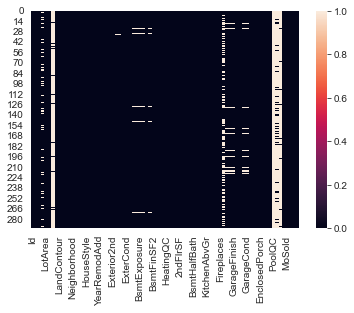

In [84]:
sns.heatmap(df_1.isnull())

LotFrontage, Alley, MasVnrType, MasVnrArea, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageQual, GarageCond, PoolQC, Fence and MiscFeature have null values.


In [85]:

df_1.drop(['Alley','PoolQC','Fence','MiscFeature'],axis=1,inplace=True)

In [86]:
df_1_object_list=[]
for i in df_1.columns:
    if df_1[i].dtypes == "object":
        df_1_object_list.append(i)
for i in df_1_object_list:
    df_1[i]=df_1[i].fillna(df_1[i].mode()[0])
df_1_int_types=[]
for i in df_1.columns:
    if df_1[i].dtypes == "int64":
        df_1_int_types.append(i)
for i in df_1_int_types:
    df_1[i]=df_1[i].fillna(df_1[i].mean())
df_1_float_types=[]
for i in df_1.columns:
    if df_1[i].dtypes == "float64":
        df_1_float_types.append(i)

In [87]:
df_1_float_types

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [88]:
for i in df_1_float_types:
    df_1[i]=df_1[i].fillna(df_1[i].mean())
df_1.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual 

<AxesSubplot:>

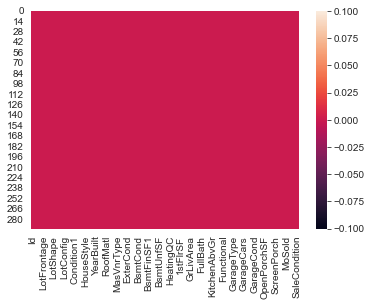

In [89]:
sns.heatmap(df_1.isnull())

In [90]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
for i in df_1_object_list:
    df_1[i]=LE.fit_transform(df_1[i])
    print(df_1[i].value_counts().sort_index())

0      1
1     13
2    223
3     55
Name: MSZoning, dtype: int64
0      2
1    290
Name: Street, dtype: int64
0     94
1      9
2      4
3    185
Name: LotShape, dtype: int64
0     13
1      8
2      6
3    265
Name: LandContour, dtype: int64
0    291
1      1
Name: Utilities, dtype: int64
0     41
1     25
2     14
3      2
4    210
Name: LotConfig, dtype: int64
0    277
1     14
2      1
Name: LandSlope, dtype: int64
0      2
1      5
2      8
3      4
4     32
5      6
6     17
7     15
8      7
9      8
10    15
11    43
12     1
13    14
14     6
15    16
16    27
17     4
18    14
19     8
20    18
21     6
22    14
23     2
Name: Neighborhood, dtype: int64
0     10
1     14
2    255
3      2
4      2
5      2
6      6
7      1
Name: Condition1, dtype: int64
0    291
1      1
Name: Condition2, dtype: int64
0    239
1      4
2     11
3     14
4     24
Name: BldgType, dtype: int64
0     33
1      2
2    148
3      1
4      1
5     84
6      5
7     18
Name: HouseStyle, dtype: int64

In [91]:
df_1["Utilities"].value_counts()

0    291
1      1
Name: Utilities, dtype: int64

In [92]:
#Plotting Outliers
df_1.shape

(292, 76)

Id                   AxesSubplot(0.125,0.86337;0.352273x0.01663)
MSSubClass        AxesSubplot(0.547727,0.86337;0.352273x0.01663)
MSZoning            AxesSubplot(0.125,0.843414;0.352273x0.01663)
LotFrontage      AxesSubplot(0.547727,0.843414;0.352273x0.01663)
LotArea             AxesSubplot(0.125,0.823458;0.352273x0.01663)
Street           AxesSubplot(0.547727,0.823458;0.352273x0.01663)
LotShape            AxesSubplot(0.125,0.803502;0.352273x0.01663)
LandContour      AxesSubplot(0.547727,0.803502;0.352273x0.01663)
Utilities           AxesSubplot(0.125,0.783546;0.352273x0.01663)
LotConfig        AxesSubplot(0.547727,0.783546;0.352273x0.01663)
LandSlope            AxesSubplot(0.125,0.76359;0.352273x0.01663)
Neighborhood      AxesSubplot(0.547727,0.76359;0.352273x0.01663)
Condition1          AxesSubplot(0.125,0.743634;0.352273x0.01663)
Condition2       AxesSubplot(0.547727,0.743634;0.352273x0.01663)
BldgType            AxesSubplot(0.125,0.723678;0.352273x0.01663)
HouseStyle       AxesSubp

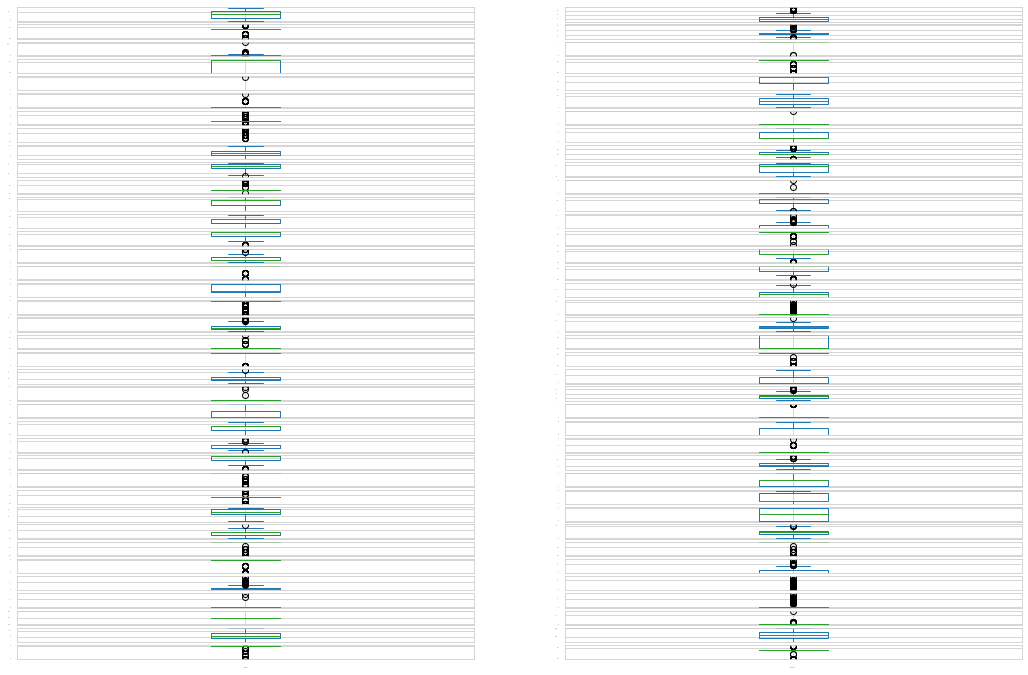

In [93]:
df_1.plot(kind='box',subplots=True,layout=(38,2),sharex=False,fontsize=1,figsize=(18,12))

All the variables have outliers except Id, LotShape, LotConfig ,Neighborhood, HouseStyle , YearRemodAdd,


In [94]:

from scipy.stats import zscore
z=np.abs(zscore(df_1))
z

Id  MSSubClass  MSZoning  LotFrontage   LotArea    Street  \
0    0.948278    0.856054  0.287006     0.981605  0.263894  0.083045   
1    0.593120    1.431981  0.287006     0.000000  0.363030  0.083045   
2    0.391675    0.856054  0.287006     0.000000  0.089636  0.083045   
3    0.887367    0.287963  0.287006     0.429998  0.101809  0.083045   
4    1.066178    0.059160  0.287006     0.981605  0.297033  0.083045   
..        ...         ...       ...          ...       ...       ...   
287  1.523190    0.856054  0.287006     0.580436  0.032999  0.083045   
288  0.661023    0.856054  0.287006     0.472632  0.105212  0.083045   
289  1.672576    0.856054  0.287006     0.000000  0.044775  0.083045   
290  0.527279    0.169644  1.808136     0.823655  0.424197  0.083045   
291  1.410220    2.347195  1.808136     2.277892  0.653160  0.083045   

     LotShape  LandContour  Utilities  LotConfig  LandSlope  Neighborhood  \
0    1.402669     2.566101   0.058621   2.001106   0.226274      1.554460   
1    1.402669     0.299297   0.058621   1.351136   0.226274      1.554460   
2    0.745474     0.299297   0.058621   0.598774   0.226274      1.281387   
3    0.745474     3.998799   0.058621   0.598774   0.226274      1.114572   
4    1.402669     0.299297   0.058621   1.351136   0.226274      1.387645   
..        ...          ...        ...        ...        ...           ...   
287  0.745474     0.299297   0.058621   0.598774   0.226274      1.387645   
288  0.686621     0.299297   0.058621   0.598774   0.226274      1.281387   
289  1.402669     0.299297   0.058621   1.351136   0.226274      0.113685   
290  0.745474     0.299297   0.058621   2.001106   0.226274      1.615015   
291  0.745474     0.299297   0.058621   0.598774   0.226274      1.781830   

     Condition1  Condition2  BldgType  HouseStyle  OverallQual  OverallCond  \
0      0.028763    0.058621  0.444642    0.518671     2.157766     0.464603   
1      0.028763    0.058621  2.722077    0.518671     1.419117     0.464603   
2      0.028763    0.058621  0.444642    0.518671     1.419117     0.464603   
3      0.028763    0.058621  0.444642    1.011146     0.680468     1.419621   
4      1.228602    0.058621  0.444642    1.011146     0.058181     0.464603   
..          ...         ...       ...         ...          ...          ...   
287    0.028763    0.058621  0.444642    0.518671     1.419117     0.464603   
288    0.028763    0.058621  0.444642    0.518671     0.796830     0.464603   
289    0.028763    0.058621  0.444642    0.518671     0.058181     1.419621   
290    1.228602    0.058621  0.444642    1.538548     0.058181     1.419621   
291    0.028763    0.058621  1.930397    1.011146     0.058181     0.464603   

     YearBuilt  YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  Exterior2nd  \
0     1.065430      1.031595   1.846195  0.078757     0.694397     0.733065   
1     0.374523      0.064496   0.523427  0.078757     1.046066     1.248926   
2     0.933828      0.782483   1.846195  0.078757     0.694397     0.733065   
3     1.040191      1.758454   0.523427  0.078757     0.610950     0.588262   
4     1.131230      1.081417   0.523427  0.078757     0.694397     0.733065   
..         ...           ...        ...       ...          ...          ...   
287   1.131230      1.081417   0.523427  0.078757     0.694397     0.733065   
288   0.703526      0.483549   0.523427  0.078757     0.694397     0.733065   
289   0.086082      0.762008   0.523427  0.078757     1.129513     1.063397   
290   0.842789      1.758454   0.523427  0.078757     1.481182     1.579258   
291   0.012619      0.612541   0.523427  0.078757     1.046066     1.248926   

     MasVnrType  MasVnrArea  ExterQual  ExterCond  Foundation  BsmtQual  \
0      1.952161    0.520715   0.857858   0.326787    0.776109  2.549340   
1      0.355435    0.625879   0.857858   0.326787    0.518884  0.303768   
2      0.355435    0.625879   0.857858   0.326787    0.776109  0.303768   
3      0.355435    0.62

In [95]:
threshold=3
print(np.where(z>3))

(array([  1,   1,   3,   8,   8,   8,   9,  10,  10,  10,  11,  12,  12,
        12,  13,  13,  13,  13,  14,  15,  19,  20,  20,  23,  23,  23,
        23,  23,  23,  24,  24,  24,  29,  29,  29,  30,  30,  32,  33,
        33,  34,  34,  34,  36,  38,  40,  45,  45,  46,  46,  47,  47,
        47,  49,  50,  51,  52,  53,  53,  54,  55,  55,  55,  58,  58,
        58,  58,  58,  58,  66,  69,  71,  71,  71,  71,  71,  71,  72,
        72,  72,  73,  73,  73,  74,  79,  81,  81,  81,  82,  82,  83,
        83,  85,  85,  85,  86,  86,  87,  88,  91,  92,  92,  92, 102,
       102, 105, 105, 105, 106, 106, 107, 107, 107, 109, 109, 109, 112,
       113, 113, 114, 115, 115, 115, 116, 117, 118, 119, 122, 123, 123,
       124, 124, 127, 127, 127, 127, 128, 128, 128, 128, 128, 129, 129,
       129, 130, 130, 133, 134, 134, 134, 139, 140, 140, 140, 141, 141,
       141, 141, 141, 141, 141, 142, 142, 143, 143, 144, 146, 146, 146,
       146, 146, 147, 148, 151, 154, 154, 154, 155, 157, 157, 1

In [96]:
df_1_new=df_1[(z<3).all(axis=1)]
df_1_new.shape

(0, 76)

In [97]:
df_1.shape

(292, 76)

In [98]:
((1168-468)/1168)*100

59.93150684931506

In [99]:
Q1=df_1.quantile(0.25)
Q3=df_1.quantile(0.75)
IQR=Q3-Q1
df_1_new1=df_1[~((df_1<(Q1-1.5*IQR))|(df_1<(Q3+1.5*IQR))).any(axis=1)]
print("shape before and after")
print("shape before".ljust(20),":",df_1.shape)
print("shape after".ljust(20),":",df_1_new1.shape)

shape before and after
shape before         : (292, 76)
shape after          : (0, 76)


In [100]:
print("Percentage Loss".ljust(20),":",(df_1.shape[0]-df_1_new1.shape[0])/df_1.shape[0])

Percentage Loss      : 1.0


In [101]:
df_1.shape

(292, 76)

In [102]:
df_1.skew()

Id               -0.108806
MSSubClass        1.358597
MSZoning          0.187174
LotFrontage       0.466813
LotArea          12.781805
Street          -12.020386
LotShape         -0.639195
LandContour      -3.332422
Utilities        17.088007
LotConfig        -1.204667
LandSlope         4.639043
Neighborhood      0.046894
Condition1        2.808950
Condition2       17.088007
BldgType          1.997202
HouseStyle        0.386773
OverallQual       0.397312
OverallCond       1.209714
YearBuilt        -0.755233
YearRemodAdd     -0.535600
RoofStyle         1.386333
RoofMatl         13.717569
Exterior1st      -0.643455
Exterior2nd      -0.672944
MasVnrType        0.037914
MasVnrArea        1.976804
ExterQual        -1.920606
ExterCond        -3.595056
Foundation        0.380626
BsmtQual         -1.348604
BsmtCond         -4.869596
BsmtExposure     -1.289092
BsmtFinType1      0.040656
BsmtFinSF1        0.739790
BsmtFinType2     -3.702330
BsmtFinSF2        3.698543
BsmtUnfSF         0.960708
T

In [103]:
df_1_rs=['MSSubClass','LotArea','Utilities','LandSlope','Condition1','Condition2','BldgType','OverallCond','RoofStyle','RoofMatl',
      'MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','Heating','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','BsmtHalfBath',
     'HalfBath','KitchenAbvGr','TotRmsAbvGrd', 'FireplaceQu','GarageType','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch',
      'ScreenPorch','MiscVal']
for val in df_1_rs:
    if df_1.skew().loc[val]>0.55:
        df_1[val]=np.sqrt(df_1[val])
df_1.skew()

Id               -0.108806
MSSubClass        0.783807
MSZoning          0.187174
LotFrontage       0.466813
LotArea           5.201616
Street          -12.020386
LotShape         -0.639195
LandContour      -3.332422
Utilities        17.088007
LotConfig        -1.204667
LandSlope         4.173753
Neighborhood      0.046894
Condition1       -1.511990
Condition2       17.088007
BldgType          1.785749
HouseStyle        0.386773
OverallQual       0.397312
OverallCond       0.870844
YearBuilt        -0.755233
YearRemodAdd     -0.535600
RoofStyle         1.145759
RoofMatl         12.535240
Exterior1st      -0.643455
Exterior2nd      -0.672944
MasVnrType        0.037914
MasVnrArea        0.876657
ExterQual        -1.920606
ExterCond        -3.595056
Foundation        0.380626
BsmtQual         -1.348604
BsmtCond         -4.869596
BsmtExposure     -1.289092
BsmtFinType1      0.040656
BsmtFinSF1       -0.107664
BsmtFinType2     -3.702330
BsmtFinSF2        2.921229
BsmtUnfSF        -0.305887
T

In [104]:
df_1_rs=['MSSubClass','LotArea','Utilities','LandSlope','Condition1','Condition2','BldgType','OverallCond','RoofStyle','RoofMatl',
      'MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','Heating','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','BsmtHalfBath',
     'HalfBath','KitchenAbvGr','TotRmsAbvGrd', 'FireplaceQu','GarageType','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch',
      'ScreenPorch','MiscVal']
for val in df_1_rs:
    if df_1.skew().loc[val]>0.55:
        df_1[val]=np.sqrt(df_1[val])
df_1.skew()

Id               -0.108806
MSSubClass        0.517859
MSZoning          0.187174
LotFrontage       0.466813
LotArea           1.946481
Street          -12.020386
LotShape         -0.639195
LandContour      -3.332422
Utilities        17.088007
LotConfig        -1.204667
LandSlope         4.102861
Neighborhood      0.046894
Condition1       -1.511990
Condition2       17.088007
BldgType          1.699812
HouseStyle        0.386773
OverallQual       0.397312
OverallCond       0.679069
YearBuilt        -0.755233
YearRemodAdd     -0.535600
RoofStyle        -0.275276
RoofMatl         12.156092
Exterior1st      -0.643455
Exterior2nd      -0.672944
MasVnrType        0.037914
MasVnrArea        0.494213
ExterQual        -1.920606
ExterCond        -3.595056
Foundation        0.380626
BsmtQual         -1.348604
BsmtCond         -4.869596
BsmtExposure     -1.289092
BsmtFinType1      0.040656
BsmtFinSF1       -0.107664
BsmtFinType2     -3.702330
BsmtFinSF2        2.673829
BsmtUnfSF        -0.305887
T

In [105]:
df_1.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual 

In [106]:
df_1_rs=['MSSubClass','LotArea','Utilities','LandSlope','Condition1','Condition2','BldgType','OverallCond','RoofStyle','RoofMatl',
      'MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','Heating','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','BsmtHalfBath',
     'HalfBath','KitchenAbvGr','TotRmsAbvGrd', 'FireplaceQu','GarageType','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch',
      'ScreenPorch','MiscVal']
for val in df_1_rs:
    if df_1.skew().loc[val]>0.55:
        df_1[val]=np.sqrt(df_1[val])
df_1.skew()

Id               -0.108806
MSSubClass        0.517859
MSZoning          0.187174
LotFrontage       0.466813
LotArea           0.826465
Street          -12.020386
LotShape         -0.639195
LandContour      -3.332422
Utilities        17.088007
LotConfig        -1.204667
LandSlope         4.089410
Neighborhood      0.046894
Condition1       -1.511990
Condition2       17.088007
BldgType          1.671964
HouseStyle        0.386773
OverallQual       0.397312
OverallCond       0.576331
YearBuilt        -0.755233
YearRemodAdd     -0.535600
RoofStyle        -0.275276
RoofMatl         12.054775
Exterior1st      -0.643455
Exterior2nd      -0.672944
MasVnrType        0.037914
MasVnrArea        0.494213
ExterQual        -1.920606
ExterCond        -3.595056
Foundation        0.380626
BsmtQual         -1.348604
BsmtCond         -4.869596
BsmtExposure     -1.289092
BsmtFinType1      0.040656
BsmtFinSF1       -0.107664
BsmtFinType2     -3.702330
BsmtFinSF2        2.598565
BsmtUnfSF        -0.305887
T

In [107]:
df_1.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual 

In [108]:
df_1_ls=['SaleCondition','SaleType','PavedDrive','GarageCond','GarageQual','GarageYrBlt','FireplaceQu','Functional','KitchenQual',
      'Electrical','Street','LotShape','LandContour','LotConfig','Condition1','YearBuilt','Exterior1st','Exterior2nd','ExterQual',
       'ExterCond','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType2','CentralAir'
      ]
for val in df_1_ls:
    if df_1.skew().loc[val]<-0.55:
        df_1[val]=np.cbrt(df_1[val])
df_1.skew()

Id               -0.108806
MSSubClass        0.517859
MSZoning          0.187174
LotFrontage       0.466813
LotArea           0.826465
Street          -12.020386
LotShape         -0.730099
LandContour      -4.068597
Utilities        17.088007
LotConfig        -1.742500
LandSlope         4.089410
Neighborhood      0.046894
Condition1       -4.678408
Condition2       17.088007
BldgType          1.671964
HouseStyle        0.386773
OverallQual       0.397312
OverallCond       0.576331
YearBuilt        -0.775310
YearRemodAdd     -0.535600
RoofStyle        -0.275276
RoofMatl         12.054775
Exterior1st      -2.264538
Exterior2nd      -2.404380
MasVnrType        0.037914
MasVnrArea        0.494213
ExterQual        -4.419063
ExterCond        -9.115418
Foundation        0.380626
BsmtQual         -2.529539
BsmtCond         -6.245798
BsmtExposure     -1.835479
BsmtFinType1      0.040656
BsmtFinSF1       -0.107664
BsmtFinType2     -5.666701
BsmtFinSF2        2.598565
BsmtUnfSF        -0.305887
T

In [109]:
df_1.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual 

In [110]:
df_1_ls=['SaleCondition','SaleType','PavedDrive','GarageCond','GarageQual','GarageYrBlt','FireplaceQu','Functional','KitchenQual',
      'Electrical','Street','LotShape','LandContour','LotConfig','Condition1','YearBuilt','Exterior1st','Exterior2nd','ExterQual',
       'ExterCond','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType2','CentralAir'
      ]
for val in df_1_ls:
    if df_1.skew().loc[val]<-0.55:
        df_1[val]=np.cbrt(df_1[val])
df_1.skew()

Id               -0.108806
MSSubClass        0.517859
MSZoning          0.187174
LotFrontage       0.466813
LotArea           0.826465
Street          -12.020386
LotShape         -0.760571
LandContour      -4.378163
Utilities        17.088007
LotConfig        -2.022062
LandSlope         4.089410
Neighborhood      0.046894
Condition1       -5.097990
Condition2       17.088007
BldgType          1.671964
HouseStyle        0.386773
OverallQual       0.397312
OverallCond       0.576331
YearBuilt        -0.782070
YearRemodAdd     -0.535600
RoofStyle        -0.275276
RoofMatl         12.054775
Exterior1st      -9.483070
Exterior2nd      -8.032821
MasVnrType        0.037914
MasVnrArea        0.494213
ExterQual        -5.309694
ExterCond       -15.367324
Foundation        0.380626
BsmtQual         -2.789816
BsmtCond         -6.712071
BsmtExposure     -2.042390
BsmtFinType1      0.040656
BsmtFinSF1       -0.107664
BsmtFinType2     -8.647048
BsmtFinSF2        2.598565
BsmtUnfSF        -0.305887
T

In [111]:
df_1.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual 

In [112]:
df_1_ls=['SaleCondition','SaleType','PavedDrive','GarageCond','GarageQual','GarageYrBlt','FireplaceQu','Functional','KitchenQual',
      'Electrical','Street','LotShape','LandContour','LotConfig','Condition1','YearBuilt','Exterior1st','Exterior2nd','ExterQual',
       'ExterCond','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType2','CentralAir'
      ]
for val in df_1_ls:
    if df_1.skew().loc[val]<-0.55:
        df_1[val]=np.cbrt(df_1[val])
df_1.skew()

Id               -0.108806
MSSubClass        0.517859
MSZoning          0.187174
LotFrontage       0.466813
LotArea           0.826465
Street          -12.020386
LotShape         -0.765550
LandContour      -4.431894
Utilities        17.088007
LotConfig        -2.073348
LandSlope         4.089410
Neighborhood      0.046894
Condition1       -5.143036
Condition2       17.088007
BldgType          1.671964
HouseStyle        0.386773
OverallQual       0.397312
OverallCond       0.576331
YearBuilt        -0.784331
YearRemodAdd     -0.535600
RoofStyle        -0.275276
RoofMatl         12.054775
Exterior1st     -15.699839
Exterior2nd     -11.376171
MasVnrType        0.037914
MasVnrArea        0.494213
ExterQual        -5.439971
ExterCond       -16.866814
Foundation        0.380626
BsmtQual         -2.823783
BsmtCond         -6.784245
BsmtExposure     -2.076073
BsmtFinType1      0.040656
BsmtFinSF1       -0.107664
BsmtFinType2     -9.603529
BsmtFinSF2        2.598565
BsmtUnfSF        -0.305887
T

In [113]:
#Scaling of Data
df_1.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodD

In [114]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
df_1=sc.fit_transform(df_1)
df_1=pd.DataFrame(df_1)
df_1.shape

(292, 76)

In [115]:
df.shape

(482, 69)

In [116]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=58)
lm=LinearRegression()
lm.fit(x_train,y_train)
pred=lm.predict(x_test)
r2score=r2_score(y_test,pred)
print(r2_score(y_test,pred))
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,pred))
print('Mean squared error:',mean_squared_error(y_test,pred))
print('Root Mean squared error:',np.sqrt(mean_squared_error(y_test,pred)))

0.9083667372365822
error:
Mean absolute error: 13081.271656221843
Mean squared error: 276162352.2001551
Root Mean squared error: 16618.1332345169


In [117]:
#Saving the model
import joblib
joblib.dump(lm,"lm_house_pricing.obj")

['lm_house_pricing.obj']

In [118]:
#Making Predictions
a=joblib.load("lm_house_pricing.obj")

In [119]:
pred

array([ 96817.87529202, 180503.20492148,  74298.69760164, 203138.93993749,
       183189.44051041, 137379.01224741, 152360.97618518, 144023.07191622,
       140665.62149975,  73006.45781698, 126482.54709203, 114709.94528106,
       201447.22484972, 202475.97469417, 196562.36439507, 140404.03535224,
       155708.91823206, 158082.08154469, 212712.68769331, 233584.21695476,
       136401.81374993, 155967.45269851, 133894.94485045, 166065.00194923,
       154733.77225645, 194793.04019138, 176765.55318945, 179576.99006392,
       203790.90184991, 187917.42692715, 189701.29896893,  85777.64613684,
       160228.74864983, 230460.6377909 , 279385.88265301, 152169.68019879,
       168139.37613979, 124366.98110678, 101385.09319062, 126167.18781405,
       209391.4923836 , 105439.06376043, 143046.46388968, 136448.65242155,
       252028.74643714, 219989.57224838, 197499.1911884 , 183822.88749649,
       136261.39062341, 116410.62843585, 245093.85680337, 192010.55921449,
       140548.49558261, 1